#### Day 1

In [1]:
import math
import itertools

import numpy as np
import pandas as pd
import networkx as nx

from random import randint
from collections import Counter, defaultdict
from copy import deepcopy

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
with open('day1.txt', 'r') as file:
    solution = 0
    for x in file.readlines():
        solution += math.trunc(float(x)/3) -2

solution

3336439

In [3]:
def fuel_calc(num: float) -> float:
    calc = math.trunc(num/3) - 2
    if calc > 0:
        return calc
    else:
        return 0

In [4]:
with open('day1.txt', 'r') as file:
    solution = 0
    for x in file.readlines():
        solution += fuel_calc(float(x))

        add_fuel = fuel_calc(fuel_calc(float(x)))
        solution += add_fuel

        while fuel_calc(add_fuel) > 0: 
            add_fuel = fuel_calc(add_fuel)
            solution += add_fuel

solution

5001791

#### Day 2

In [5]:
with open('day2.txt', 'r') as file:
    intcode = [int(x) for x in file.read().split(',')]
    intcode[1] = 12
    intcode[2] = 2

In [6]:
class IntCode:
    def __init__(self, intcode, noun, verb):
        self.intcode = intcode
        self.noun = noun
        self.verb = verb
    
    @classmethod
    def load_txt(cls, filename):
        with open(filename, 'r') as file:
            return cls(intcode = [int(x) for x in file.read().split(',')], noun = intcode[1], verb = intcode[2])
    
    @staticmethod
    def manual_read(target, test=0):
        x = target[:]
        for num in range(0, len(x), 4):
            current_op = x[num]

            if current_op == 99:
                break
            else:
                input_loc1 = x[num+1]
                input_loc2 = x[num+2]
                output_loc3 = x[num+3]
                if current_op == 1:
                    x[output_loc3] = x[input_loc1] + x[input_loc2]
                elif current_op == 2:
                    x[output_loc3] = x[input_loc1] * x[input_loc2]

            if test == 1:
                break

        return x[0]
    
    def intcodeRead(self, noun=-1, verb=-1, test = 0):
        x = self.intcode[:]
        if noun == -1 or verb == -1:
            print(f'No valid noun/verb pair, using default Noun: {self.noun}, Verb:{self.verb}')
            x[1] = self.noun
            x[2] = self.verb
        else:
            x[1] = noun
            x[2] = verb

        result = self.manual_read(x, test)
        return result

    def brute_force(self, target):
        noun_t = randint(0, 100)
        verb_t = randint(0, 100)
        
        while self.intcodeRead(noun=noun_t, verb=verb_t) != target:
            print(f'Pair noun: {noun_t}, verb: {verb_t}, result = {self.intcodeRead(noun=noun_t, verb=verb_t)}')
            noun_t = randint(0, 100)
            verb_t = randint(0, 100)
            
        print(noun_t, verb_t)

In [7]:
a = IntCode.load_txt('day2.txt')
a.brute_force(19690720)

Pair noun: 72, verb: 7, result = 42154651
Pair noun: 87, verb: 30, result = 50794674
Pair noun: 41, verb: 10, result = 24298654
Pair noun: 92, verb: 32, result = 53674676
Pair noun: 5, verb: 28, result = 3562672
Pair noun: 43, verb: 75, result = 25450719
Pair noun: 62, verb: 6, result = 36394650
Pair noun: 28, verb: 17, result = 16810661
Pair noun: 61, verb: 81, result = 35818725
Pair noun: 3, verb: 21, result = 2410665
Pair noun: 20, verb: 23, result = 12202667
Pair noun: 90, verb: 69, result = 52522713
Pair noun: 95, verb: 89, result = 55402733
Pair noun: 61, verb: 71, result = 35818715
Pair noun: 45, verb: 69, result = 26602713
Pair noun: 59, verb: 13, result = 34666657
Pair noun: 12, verb: 2, result = 7594646
Pair noun: 44, verb: 26, result = 26026670
Pair noun: 72, verb: 72, result = 42154716
Pair noun: 87, verb: 81, result = 50794725
Pair noun: 83, verb: 78, result = 48490722
Pair noun: 29, verb: 97, result = 17386741
Pair noun: 94, verb: 12, result = 54826656
Pair noun: 7, verb:

Pair noun: 10, verb: 11, result = 6442655
Pair noun: 1, verb: 61, result = 1258705
Pair noun: 50, verb: 75, result = 29482719
Pair noun: 98, verb: 35, result = 57130679
Pair noun: 33, verb: 95, result = 19690739
Pair noun: 55, verb: 17, result = 32362661
Pair noun: 5, verb: 36, result = 3562680
Pair noun: 52, verb: 33, result = 30634677
Pair noun: 39, verb: 30, result = 23146674
Pair noun: 84, verb: 61, result = 49066705
Pair noun: 29, verb: 73, result = 17386717
Pair noun: 26, verb: 64, result = 15658708
Pair noun: 42, verb: 15, result = 24874659
Pair noun: 8, verb: 29, result = 5290673
Pair noun: 85, verb: 78, result = 49642722
Pair noun: 92, verb: 19, result = 53674663
Pair noun: 5, verb: 16, result = 3562660
Pair noun: 60, verb: 4, result = 35242648
Pair noun: 45, verb: 17, result = 26602661
Pair noun: 60, verb: 41, result = 35242685
Pair noun: 71, verb: 24, result = 41578668
Pair noun: 69, verb: 13, result = 40426657
Pair noun: 51, verb: 47, result = 30058691
Pair noun: 34, verb: 

Pair noun: 67, verb: 55, result = 39274699
Pair noun: 73, verb: 34, result = 42730678
Pair noun: 90, verb: 79, result = 52522723
Pair noun: 35, verb: 69, result = 20842713
Pair noun: 0, verb: 40, result = 682684
Pair noun: 33, verb: 72, result = 19690716
Pair noun: 62, verb: 74, result = 36394718
Pair noun: 2, verb: 89, result = 1834733
Pair noun: 21, verb: 14, result = 12778658
Pair noun: 13, verb: 6, result = 8170650
Pair noun: 17, verb: 85, result = 10474729
Pair noun: 59, verb: 75, result = 34666719
Pair noun: 56, verb: 67, result = 32938711
Pair noun: 16, verb: 10, result = 9898654
Pair noun: 42, verb: 61, result = 24874705
Pair noun: 82, verb: 18, result = 47914662
Pair noun: 72, verb: 27, result = 42154671
Pair noun: 74, verb: 7, result = 43306651
Pair noun: 57, verb: 55, result = 33514699
Pair noun: 52, verb: 4, result = 30634648
Pair noun: 72, verb: 61, result = 42154705
Pair noun: 60, verb: 38, result = 35242682
Pair noun: 76, verb: 94, result = 44458738
Pair noun: 88, verb: 

Pair noun: 13, verb: 50, result = 8170694
Pair noun: 32, verb: 41, result = 19114685
Pair noun: 60, verb: 60, result = 35242704
Pair noun: 20, verb: 35, result = 12202679
Pair noun: 65, verb: 29, result = 38122673
Pair noun: 82, verb: 2, result = 47914646
Pair noun: 89, verb: 41, result = 51946685
Pair noun: 36, verb: 31, result = 21418675
Pair noun: 96, verb: 39, result = 55978683
Pair noun: 83, verb: 31, result = 48490675
Pair noun: 65, verb: 22, result = 38122666
Pair noun: 89, verb: 12, result = 51946656
Pair noun: 35, verb: 32, result = 20842676
Pair noun: 97, verb: 11, result = 56554655
Pair noun: 23, verb: 21, result = 13930665
Pair noun: 47, verb: 68, result = 27754712
Pair noun: 85, verb: 29, result = 49642673
Pair noun: 61, verb: 49, result = 35818693
Pair noun: 81, verb: 9, result = 47338653
Pair noun: 74, verb: 48, result = 43306692
Pair noun: 64, verb: 81, result = 37546725
Pair noun: 9, verb: 94, result = 5866738
Pair noun: 53, verb: 99, result = 31210743
Pair noun: 24, v

Pair noun: 85, verb: 17, result = 49642661
Pair noun: 5, verb: 52, result = 3562696
Pair noun: 50, verb: 24, result = 29482668
Pair noun: 75, verb: 4, result = 43882648
Pair noun: 49, verb: 60, result = 28906704
Pair noun: 31, verb: 41, result = 18538685
Pair noun: 100, verb: 22, result = 58282666
Pair noun: 48, verb: 43, result = 28330687
Pair noun: 24, verb: 39, result = 14506683
Pair noun: 23, verb: 47, result = 13930691
Pair noun: 36, verb: 88, result = 21418732
Pair noun: 90, verb: 37, result = 52522681
Pair noun: 24, verb: 18, result = 14506662
Pair noun: 44, verb: 9, result = 26026653
Pair noun: 7, verb: 64, result = 4714708
Pair noun: 20, verb: 95, result = 12202739
Pair noun: 55, verb: 82, result = 32362726
Pair noun: 67, verb: 75, result = 39274719
Pair noun: 12, verb: 28, result = 7594672
Pair noun: 67, verb: 87, result = 39274731
Pair noun: 69, verb: 61, result = 40426705
Pair noun: 10, verb: 84, result = 6442728
Pair noun: 40, verb: 17, result = 23722661
Pair noun: 80, ver

Pair noun: 29, verb: 76, result = 17386720
Pair noun: 20, verb: 93, result = 12202737
Pair noun: 86, verb: 66, result = 50218710
Pair noun: 38, verb: 66, result = 22570710
Pair noun: 2, verb: 13, result = 1834657
Pair noun: 95, verb: 23, result = 55402667
Pair noun: 25, verb: 45, result = 15082689
Pair noun: 60, verb: 90, result = 35242734
Pair noun: 92, verb: 47, result = 53674691
Pair noun: 0, verb: 47, result = 682691
Pair noun: 56, verb: 36, result = 32938680
Pair noun: 28, verb: 68, result = 16810712
Pair noun: 1, verb: 23, result = 1258667
Pair noun: 64, verb: 10, result = 37546654
Pair noun: 99, verb: 11, result = 57706655
Pair noun: 42, verb: 63, result = 24874707
Pair noun: 92, verb: 41, result = 53674685
Pair noun: 53, verb: 61, result = 31210705
Pair noun: 65, verb: 6, result = 38122650
Pair noun: 48, verb: 41, result = 28330685
Pair noun: 83, verb: 27, result = 48490671
Pair noun: 73, verb: 100, result = 42730744
Pair noun: 80, verb: 47, result = 46762691
Pair noun: 9, verb

#### Day 3

In [8]:
def line_point_cov(string) -> list:
    # ref
    ref = {'R': np.array([1,0]), 'L': np.array([-1,0]), 'U': np.array([0,1]), 'D': np.array([0,-1])}
    
    # clean
    line = [aa.strip() for aa in string.split(',')]
    current_pos = np.array([0,0])    
    
    point_list = [] #from position 1 to end
    endpoints = [current_pos]
    
    for a in line:
        delta = ref[a[0]] * int(a[1:])
        new_pos = current_pos + delta
        
        collect_x = [current_pos[0], new_pos[0]]
        collect_y = [current_pos[1], new_pos[1]]
        
        point_list.extend([(x,y) for x in range(min(collect_x),max(collect_x)+1,1) for y in range(min(collect_y),max(collect_y)+1,1)])
        endpoints.append(new_pos)
        
        current_pos = new_pos
        
    return point_list, endpoints

In [9]:
with open('day3.txt', 'r') as file:
    point_1, end_1 = line_point_cov(file.readline())
    point_2, end_2 = line_point_cov(file.readline())
    line_1 = set(point_1)
    line_2 = set(point_2)

In [10]:
sorted([(x, abs(x[0])+abs(x[1])) for x in line_1.intersection(line_2)], key = lambda x: x[1])

[((0, 0), 0),
 ((-610, 675), 1285),
 ((-517, 777), 1294),
 ((-274, 1105), 1379),
 ((-886, 557), 1443),
 ((-771, 675), 1446),
 ((-274, 1269), 1543),
 ((-999, 557), 1556),
 ((-274, 1286), 1560),
 ((-309, 1411), 1720),
 ((-557, 1201), 1758),
 ((-771, 987), 1758),
 ((-490, 1269), 1759),
 ((-1648, 112), 1760),
 ((-490, 1286), 1776),
 ((-517, 1269), 1786),
 ((-517, 1286), 1803),
 ((-1728, -115), 1843),
 ((-1320, 536), 1856),
 ((-1753, 112), 1865),
 ((-1470, 536), 2006),
 ((-1753, 282), 2035),
 ((-751, 1286), 2037),
 ((-1648, 413), 2061),
 ((-905, 1201), 2106),
 ((-905, 1258), 2163),
 ((-905, 1267), 2172),
 ((-766, 1509), 2275),
 ((-766, 1526), 2292),
 ((-899, 1506), 2405),
 ((-1444, 1051), 2495),
 ((-2674, -53), 2727),
 ((-714, 2037), 2751),
 ((-2674, -237), 2911),
 ((-648, 2290), 2938),
 ((-714, 2290), 3004),
 ((-3076, -53), 3129),
 ((-3110, -53), 3163),
 ((-880, 2290), 3170),
 ((-3429, -97), 3526),
 ((-3429, -198), 3627),
 ((-1944, 1899), 3843),
 ((-3857, -97), 3954),
 ((-3857, -198), 4055

In [11]:
endcop = end_1[1:]
intersections = line_1.intersection(line_2)
intersections.remove((0,0))
new_end1 = [np.array([0, 0])]

for a in endcop:
    for point in intersections:
        align_x = point[0] == new_end1[-1][0]
        align_y = point[1] == new_end1[-1][1]
        
        mod_x = abs(point[0] - new_end1[-1][0])
        mod_y = abs(point[1] - new_end1[-1][1])
        
        if (align_x and mod_y) or (align_y and mod_x):
            new_end1.append(point)
        
    new_end1.append(a)
        

In [12]:
def line_rebuild(endpoints, intersections):
    completed = []

    for a, b in zip(endpoints, endpoints[1:]):
        change_x = abs(a[0] - b[0]) > 0  
        change_y = abs(a[1] - b[1]) > 0  
        intersecting = [a]
        flag_key = None

        for point in intersections:
            align_x = point[0] == a[0]
            align_y = point[1] == a[1]

            if change_x and align_y:
                intersecting.append(np.array(point))
                flag_key = 0
            elif change_y and align_x:
                intersecting.append(np.array(point))
                flag_key = 1

        key_1 = a[flag_key]
        key_2 = b[flag_key]

        if flag_key != None:
            flag_order = True if key_1 > key_2 else False
            intersecting = sorted(intersecting, reverse=flag_order, key = lambda x: x[flag_key])

        completed.extend(intersecting)

    return completed

In [13]:
intersections = line_1.intersection(line_2)
intersections.remove((0,0))

line_rebuild(end_1, intersections)

[array([0, 0]),
 array([995,   0]),
 array([ 995, -933]),
 array([ 711, -933]),
 array([ 711, -353]),
 array([1164, -353]),
 array([1164,    2]),
 array([812,   2]),
 array([812, 365]),
 array([306, 365]),
 array([306, 235]),
 array([606, 235]),
 array([606, 123]),
 array([-145,  123]),
 array([-145,  368]),
 array([ 29, 368]),
 array([  29, 1269]),
 array([-274, 1269]),
 array([-490, 1269]),
 array([-517, 1269]),
 array([-557, 1269]),
 array([-557, 1201]),
 array([-557, 1199]),
 array([-905, 1199]),
 array([-905, 1201]),
 array([-905, 1258]),
 array([-905, 1267]),
 array([-905, 1506]),
 array([-899, 1506]),
 array([-309, 1506]),
 array([-309, 1411]),
 array([-309, 1105]),
 array([-274, 1105]),
 array([   2, 1105]),
 array([  2, 777]),
 array([-517,  777]),
 array([-610,  777]),
 array([-610,  675]),
 array([-610,  563]),
 array([-771,  563]),
 array([-771,  675]),
 array([-771,  987]),
 array([-771, 1051]),
 array([-1444,  1051]),
 array([-1584,  1051]),
 array([-1584,  1349]),
 array

In [14]:
new_line_1 = line_rebuild(end_1, intersections)
new_line_2 = line_rebuild(end_2, intersections)
final_answer3 = {}

for point in intersections:
    up_to_intersect1 = new_line_1[0:[np.array_equal(point,x) for x in new_line_1].index(True) + 1]
    up_to_intersect2 = new_line_2[0:[np.array_equal(point,x) for x in new_line_2].index(True) + 1]
    
    line1_dist = sum([np.sum(abs(a - b)) for a, b in zip(up_to_intersect1, up_to_intersect1[1:])])
    line2_dist = sum([np.sum(abs(a - b)) for a, b in zip(up_to_intersect2, up_to_intersect2[1:])])
    
    final_answer3[point] = line1_dist+line2_dist

In [15]:
final_answer3[min(final_answer3, key=final_answer3.get)]

14228

#### Day 4

In [16]:
## INPUT RANGE FOR PASSWORD 254032-789860
def pass_check(num):
    str_form = str(num)
    flag1 = 0
    flag2 = 1
    
    # never decreases
    for val in range(len(str_form)-1):
        if str_form[val] == str_form[val+1]:
            flag1 = 1
        if int(str_form[val]) > int(str_form[val+1]):
            flag2 = 0
    
    if flag1 == 1 and flag2 == 1:
        return num
    else:
        return None

In [17]:
match_pass = 0
for number in range(254032, 789860+1, 1):
    if pass_check(number):
        match_pass += 1
match_pass

1033

In [18]:
## INPUT RANGE FOR PASSWORD 254032-789860
def modified_pass_check(num):
    str_form = str(num)
    count = Counter(str_form)
    flag1 = 0
    flag2 = 1
    
    # never decreases
    for val in range(len(str_form)-1):
        if str_form[val] == str_form[val+1] and count[str_form[val]] == 2:
            flag1 = 1
        if int(str_form[val]) > int(str_form[val+1]):
            flag2 = 0
    
    if flag1 == 1 and flag2 == 1:
        return num
    else:
        return None

In [19]:
match_pass = 0
for number in range(254032, 789860+1, 1):
    if modified_pass_check(number):
        match_pass += 1
match_pass

670

#### Day 5

In [20]:
class IntCode_v2:
    def __init__(self, intcode):
        self.intcode = intcode
        self.reset()
    
    def reset(self):
        self.work_intcode = self.intcode[:]
        self.output = []
        self.mem = {}
        
    @classmethod
    def load(cls, filename):
        with open(filename, 'r') as file:
            return cls([int(x) for x in file.read().split(',')])
    
    @classmethod
    def test_txt(cls, text, calc, **input_dict):
        test_intcode = cls([int(x) for x in text.split(',')])
        test_intcode.intcodeRead(calc, outmode = 0, **input_dict)
    
    def mode_manage(self, num, mode):
        if mode == 0:
            return self.work_intcode[num]
        elif mode == 1:
            return num
    
    
    def instr_manage(self, selfmem):      
        current_idx =  selfmem['current_idx']
        
        instr_str = str(self.work_intcode[selfmem['current_idx']])
        params = {x:int(y) for x, y in enumerate(reversed(instr_str[:len(instr_str)-2]))}
        opcode = instr_str[len(instr_str)-2:]
        
        
#         print(instr_str, opcode)
        
        print(self.work_intcode[current_idx:current_idx+4])
        if int(opcode) == 1:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            self.work_intcode[output_loc] = param_a + param_b
            
            current_idx += 4
            
        elif int(opcode) == 2:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            self.work_intcode[output_loc] = param_a * param_b
            
            current_idx += 4

        elif int(opcode) == 3: 
            try:
                move_num = self.work_intcode[current_idx + 1]            
                self.work_intcode[move_num] = selfmem['inputs'][selfmem['input_idx']]
                selfmem['input_idx'] += 1
            
                current_idx += 2
            except IndexError:
                selfmem['midhalt'] = 1
        
        elif int(opcode) == 4:
            val_output = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            self.output.append(val_output)
            
            current_idx += 2
        
        elif int(opcode) == 5:
            check = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            
            if check != 0:
                current_idx = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            else:
                current_idx += 3
        
        elif int(opcode) == 6:
            check = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            
            if check == 0:
                current_idx = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            else:
                current_idx += 3
        
        elif int(opcode) == 7:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            if param_a < param_b:
                self.work_intcode[output_loc] = 1
            else:
                self.work_intcode[output_loc] = 0
            
            current_idx += 4
        
        elif int(opcode) == 8:
            param_a = self.mode_manage(self.work_intcode[current_idx + 1], params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode[current_idx + 2], params.get(1, 0))
            output_loc = self.work_intcode[current_idx + 3]
            
            if param_a == param_b:
                self.work_intcode[output_loc] = 1
            else:
                self.work_intcode[output_loc] = 0
                
            current_idx += 4
        return current_idx
       
    def intcodeRead(self, calc, outmode = 1, **input_dict):
        current_idx = 0
        
        if self.mem == {}:
            self.mem = input_dict
            self.mem['input_idx'] = 0
            self.mem['midhalt'] = None
            self.mem['current_idx'] = 0
            
            if isinstance(self.mem['inputs'], int):
                self.mem['inputs'] = [self.mem['inputs']]
        else:
            self.mem['inputs'] = input_dict['inputs']
            self.mem['midhalt'] = 0
#         print(self.output)
             
        if calc == 'nv':
            print(
                f'Calculating using NOUN/VERB method\n' 
                f'Noun: {nv.get("noun", 0)}\n' 
                f'Verb: {nv.get("verb", 0)}\n' 
                f"Note: If noun or verb used in inputs are > 99, noun and verb default to intcode's default values"
            )
            self.work_intcode[1] = self.mem.get('noun', x[1])
            self.work_intcode[2] = self.mem.get('verb', x[2])
            
        elif calc == 'input':
            print(
                f'Calculating using input method\n'
                f'Note: Default value if "val" variable not in parameters is 0'
            )
        
        while self.work_intcode[self.mem['current_idx']] != 99 and self.mem['midhalt'] != 1:
            print(self.mem['current_idx'])
            self.mem['current_idx'] = self.instr_manage(self.mem)


        if outmode == 1:
            return self.work_intcode, self.output
        elif outmode == 'output_only':
            return self.output
        else:
            print(self.work_intcode, self.output, self.mem.get('inputs'))

In [21]:
day5 = IntCode_v2.load('day5.txt')
day5.intcodeRead('input', outmode = 0, inputs = 1)

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 225, 1, 225]
2
[1, 225, 6, 6]
6
[1101, 1, 238, 225]
10
[104, 0, 1101, 37]
12
[1101, 37, 61, 225]
16
[101, 34, 121, 224]
20
[1001, 224, -49, 224]
24
[4, 224, 102, 8]
26
[102, 8, 223, 223]
30
[1001, 224, 6, 224]
34
[1, 224, 223, 223]
38
[1101, 67, 29, 225]
42
[1, 14, 65, 224]
46
[101, -124, 224, 224]
50
[4, 224, 1002, 223]
52
[1002, 223, 8, 223]
56
[101, 5, 224, 224]
60
[1, 224, 223, 223]
64
[1102, 63, 20, 225]
68
[1102, 27, 15, 225]
72
[1102, 18, 79, 224]
76
[101, -1422, 224, 224]
80
[4, 224, 102, 8]
82
[102, 8, 223, 223]
86
[1001, 224, 1, 224]
90
[1, 223, 224, 223]
94
[1102, 20, 44, 225]
98
[1001, 69, 5, 224]
102
[101, -32, 224, 224]
106
[4, 224, 1002, 223]
108
[1002, 223, 8, 223]
112
[101, 1, 224, 224]
116
[1, 223, 224, 223]
120
[1102, 15, 10, 225]
124
[1101, 6, 70, 225]
128
[102, 86, 40, 224]
132
[101, -2494, 224, 224]
136
[4, 224, 1002, 223]
138
[1002, 223, 8, 223]
142
[101, 6, 224, 224

In [22]:
day5.reset()
day5.intcodeRead('input', outmode = 'output_only', inputs = 1)

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 225, 1, 225]
2
[1, 225, 6, 6]
6
[1101, 1, 238, 225]
10
[104, 0, 1101, 37]
12
[1101, 37, 61, 225]
16
[101, 34, 121, 224]
20
[1001, 224, -49, 224]
24
[4, 224, 102, 8]
26
[102, 8, 223, 223]
30
[1001, 224, 6, 224]
34
[1, 224, 223, 223]
38
[1101, 67, 29, 225]
42
[1, 14, 65, 224]
46
[101, -124, 224, 224]
50
[4, 224, 1002, 223]
52
[1002, 223, 8, 223]
56
[101, 5, 224, 224]
60
[1, 224, 223, 223]
64
[1102, 63, 20, 225]
68
[1102, 27, 15, 225]
72
[1102, 18, 79, 224]
76
[101, -1422, 224, 224]
80
[4, 224, 102, 8]
82
[102, 8, 223, 223]
86
[1001, 224, 1, 224]
90
[1, 223, 224, 223]
94
[1102, 20, 44, 225]
98
[1001, 69, 5, 224]
102
[101, -32, 224, 224]
106
[4, 224, 1002, 223]
108
[1002, 223, 8, 223]
112
[101, 1, 224, 224]
116
[1, 223, 224, 223]
120
[1102, 15, 10, 225]
124
[1101, 6, 70, 225]
128
[102, 86, 40, 224]
132
[101, -2494, 224, 224]
136
[4, 224, 1002, 223]
138
[1002, 223, 8, 223]
142
[101, 6, 224, 224

[0, 0, 0, 0, 0, 0, 0, 0, 0, 13933662]

In [23]:
# day5_2 = IntCode_v2.test_txt('3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,\
# 1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,\
# 999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99', calc='input', inputs=9)

day5_v2 = IntCode_v2.load('day5.txt')
day5_v2.intcodeRead('input', outmode = 0, inputs=5)

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 225, 1, 225]
2
[1, 225, 6, 6]
6
[1105, 1, 238, 225]
238
[1105, 0, 99999, 1105]
241
[1105, 227, 247, 1105]
247
[1005, 227, 99999, 1005]
250
[1005, 0, 256, 1105]
256
[1106, 227, 99999, 1106]
259
[1106, 0, 265, 1105]
265
[1006, 0, 99999, 1006]
268
[1006, 227, 274, 1105]
274
[1105, 1, 280, 1105]
280
[1, 225, 225, 225]
284
[1101, 294, 0, 0]
288
[105, 1, 0, 1105]
294
[1106, 0, 300, 1105]
300
[1, 225, 225, 225]
304
[1101, 314, 0, 0]
308
[106, 0, 0, 1105]
314
[108, 677, 677, 224]
318
[1002, 223, 2, 223]
322
[1006, 224, 329, 101]
329
[1107, 677, 226, 224]
333
[102, 2, 223, 223]
337
[1006, 224, 344, 101]
344
[8, 677, 677, 224]
348
[1002, 223, 2, 223]
352
[1006, 224, 359, 101]
355
[101, 1, 223, 223]
359
[1008, 677, 677, 224]
363
[1002, 223, 2, 223]
367
[1006, 224, 374, 101]
374
[7, 226, 677, 224]
378
[1002, 223, 2, 223]
382
[1006, 224, 389, 1001]
389
[1007, 677, 677, 224]
393
[1002, 223, 2, 223]
397


#### Day 6

In [24]:
G = nx.read_adjlist('day6.txt', delimiter = ')')

In [25]:
sum(nx.shortest_path_length(G, target = 'COM').values())

171213

In [26]:
#'YOU' node orbiting 
print(G['YOU'])
#'SAN' node orbitinh
print(G['SAN'])

{'9XB': {}}
{'B2L': {}}


In [27]:
nx.shortest_path_length(G, source='9XB', target = 'B2L')

292

#### Day 7

##### Part 1

In [28]:
class Amplif_ensem():
    def __init__(self, intcode):
        self.intcode = intcode
        self.reset()
        
    def reset(self):
        self.A1, self.A2, self.A3, self.A4, self.A5 = [IntCode_v2(self.intcode[:]) for _ in range(5)]
    
    @classmethod
    def load(cls, filename):
        with open(filename, 'r') as file:
            return cls([int(x) for x in file.read().split(',')])
    
    @classmethod
    def test_txt(cls, intcode, phase_seq, mode = 'series'):
        test_intcode = cls([int(x) for x in intcode.split(',')])
        if mode == 'series':
            test_intcode.phase_calc(phase_seq)
        elif mode == 'loop':
            test_intcode.feedback_calc(phase_seq)
        
    def phase_calc(self, phase_seq):
        print(self.intcode)
        phase = iter([int(x) for x in phase_seq.split(',')])
        
        o1 = self.A1.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [next(phase), 0])[0]
        print('amp1', o1, self.A1.work_intcode, '\n')
        
        o2 = self.A2.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [next(phase), o1])[0]
        print('amp2', o2, self.A2.work_intcode, '\n')
        
        o3 = self.A3.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [next(phase), o2])[0]
        print('amp3', o3, self.A3.work_intcode, '\n')
        
        o4 = self.A4.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [next(phase), o3])[0]
        print('amp4', o4, self.A4.work_intcode, '\n')
        
        o5 = self.A5.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [next(phase), o4])[0]
        print('amp5',o5, self.A5.work_intcode, '\n')
        
        print(f'OUTPUT TO THRUSTER: {o5}')
        return o5
    
    def phase_seq_find(self, mode = 'series'):
        self.reset()
        options = {'series': {'phase': ['0','1','2','3','4'], 'func': self.phase_calc},
                   'loop': {'phase': ['5','6','7','8','9'], 'func': self.feedback_calc}}
        max_a = {}
        
        phasecodes = iter([','.join(list(perm)) for perm in (itertools.permutations(options[mode]['phase'], 5))])
        for phase_code in phasecodes:
            self.reset()
            thrust = options[mode]['func'](phase_code)
            max_a[phase_code] = thrust
            
        best_code = [sorted(max_a, key=max_a.get, reverse=True)[0]]
        print(best_code, max_a[','.join(best_code)])
        
        return max_a

    def feedback_calc(self, phase_seq):
        print(self.intcode)

        phase = [int(x) for x in phase_seq.split(',')]
        o5 = None
        
        while self.A5.mem.get('midhalt', 1) == 1:
            if o5:
                o1 = self.A1.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[0], 0, *o5])
            else:
                o1 = self.A1.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[0], 0])
            
            o2 = self.A2.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[1], *o1])

            o3 = self.A3.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[2], *o2])

            o4 = self.A4.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[3], *o3])

            o5 = self.A5.intcodeRead(calc = 'input', outmode = 'output_only', inputs = [phase[4], *o4])
            print(self.A1.mem, self.A5.mem)
        print(f'OUTPUT TO THRUSTER: {o5[-1]}')
        return o5[-1]

In [29]:
Amplif_ensem.test_txt('3,15,3,16,1002,16,10,16,1,16,15,15,4,15,99,0,0', '4,3,2,1,0')

[3, 15, 3, 16, 1002, 16, 10, 16, 1, 16, 15, 15, 4, 15, 99, 0, 0]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 15, 3, 16]
2
[3, 16, 1002, 16]
4
[1002, 16, 10, 16]
8
[1, 16, 15, 15]
12
[4, 15, 99, 4]
amp1 4 [3, 15, 3, 16, 1002, 16, 10, 16, 1, 16, 15, 15, 4, 15, 99, 4, 0] 

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 15, 3, 16]
2
[3, 16, 1002, 16]
4
[1002, 16, 10, 16]
8
[1, 16, 15, 15]
12
[4, 15, 99, 43]
amp2 43 [3, 15, 3, 16, 1002, 16, 10, 16, 1, 16, 15, 15, 4, 15, 99, 43, 40] 

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 15, 3, 16]
2
[3, 16, 1002, 16]
4
[1002, 16, 10, 16]
8
[1, 16, 15, 15]
12
[4, 15, 99, 432]
amp3 432 [3, 15, 3, 16, 1002, 16, 10, 16, 1, 16, 15, 15, 4, 15, 99, 432, 430] 

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 15, 3, 16]
2
[3, 16, 1002, 16]
4
[1002, 16, 1

In [30]:
Amplif_ensem.test_txt('3,23,3,24,1002,24,10,24,1002,23,-1,23,\
101,5,23,23,1,24,23,23,4,23,99,0,0', '0,1,2,3,4')

[3, 23, 3, 24, 1002, 24, 10, 24, 1002, 23, -1, 23, 101, 5, 23, 23, 1, 24, 23, 23, 4, 23, 99, 0, 0]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 23, 3, 24]
2
[3, 24, 1002, 24]
4
[1002, 24, 10, 24]
8
[1002, 23, -1, 23]
12
[101, 5, 23, 23]
16
[1, 24, 23, 23]
20
[4, 23, 99, 5]
amp1 5 [3, 23, 3, 24, 1002, 24, 10, 24, 1002, 23, -1, 23, 101, 5, 23, 23, 1, 24, 23, 23, 4, 23, 99, 5, 0] 

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 23, 3, 24]
2
[3, 24, 1002, 24]
4
[1002, 24, 10, 24]
8
[1002, 23, -1, 23]
12
[101, 5, 23, 23]
16
[1, 24, 23, 23]
20
[4, 23, 99, 54]
amp2 54 [3, 23, 3, 24, 1002, 24, 10, 24, 1002, 23, -1, 23, 101, 5, 23, 23, 1, 24, 23, 23, 4, 23, 99, 54, 50] 

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 23, 3, 24]
2
[3, 24, 1002, 24]
4
[1002, 24, 10, 24]
8
[1002, 23, -1, 23]
12
[101, 5, 23, 23]
16
[1, 24, 23, 23]
20
[4, 23, 99, 

In [31]:
amplif_calc = Amplif_ensem.load('day7.txt')
result_output = amplif_calc.phase_seq_find()

[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9,

27
[4, 9, 99, 3]
amp1 0 [3, 8, 1001, 8, 10, 8, 105, 1, 10, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1

6
[105, 1, 13, 0]
76
[3, 9, 101, 5]
78
[101, 5, 9, 9]
82
[102, 4, 9, 9]
86
[1001, 9, 3, 9]
90
[1002, 9, 2, 9]
94
[101, 4, 9, 9]
98
[4, 9, 99, 3]
amp4 810 [3, 8, 1001, 8, 10, 8, 105, 1, 13, 810, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102

2
[1001, 8, 10, 8]
6
[105, 1, 14, 0]
101
[3, 9, 1002, 9]
103
[1002, 9, 2, 9]
107
[1001, 9, 3, 9]
111
[102, 5, 9, 9]
115
[4, 9, 99, 3]
amp3 705 [3, 8, 1001, 8, 10, 8, 105, 1, 14, 705, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 

30
[3, 9, 102, 4]
32
[102, 4, 9, 9]
36
[1001, 9, 3, 9]
40
[102, 2, 9, 9]
44
[101, 2, 9, 9]
48
[4, 9, 99, 3]
amp5 185648 [3, 8, 1001, 8, 10, 8, 105, 1, 11, 185648, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 

amp1 0 [3, 8, 1001, 8, 10, 8, 105, 1, 10, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 

[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 10, 0]
21
[3, 9, 102, 5]
23
[102, 5, 9, 9]
27
[4, 9, 99, 3]
amp1 0 [3, 8, 1001, 8, 10, 8, 105, 1, 10, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 

2
[1001, 8, 10, 8]
6
[105, 1, 13, 0]
76
[3, 9, 101, 5]
78
[101, 5, 9, 9]
82
[102, 4, 9, 9]
86
[1001, 9, 3, 9]
90
[1002, 9, 2, 9]
94
[101, 4, 9, 9]
98
[4, 9, 99, 3]
amp4 6002 [3, 8, 1001, 8, 10, 8, 105, 1, 13, 6002, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 

amp4 3715 [3, 8, 1001, 8, 10, 8, 105, 1, 14, 3715, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 

amp2 429 [3, 8, 1001, 8, 10, 8, 105, 1, 12, 429, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9,

[1001, 8, 10, 8]
6
[105, 1, 11, 0]
30
[3, 9, 102, 4]
32
[102, 4, 9, 9]
36
[1001, 9, 3, 9]
40
[102, 2, 9, 9]
44
[101, 2, 9, 9]
48
[4, 9, 99, 3]
amp1 8 [3, 8, 1001, 8, 10, 8, 105, 1, 11, 8, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9

amp2 114 [3, 8, 1001, 8, 10, 8, 105, 1, 13, 114, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9,

[1001, 9, 3, 9]
111
[102, 5, 9, 9]
115
[4, 9, 99, 3]
amp2 95 [3, 8, 1001, 8, 10, 8, 105, 1, 14, 95, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9,

amp1 69 [3, 8, 1001, 8, 10, 8, 105, 1, 12, 69, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4

[102, 2, 9, 9]
44
[101, 2, 9, 9]
48
[4, 9, 99, 3]
amp2 560 [3, 8, 1001, 8, 10, 8, 105, 1, 11, 560, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 

[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9,

amp5 240928 [3, 8, 1001, 8, 10, 8, 105, 1, 11, 240928, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9,

amp4 28240 [3, 8, 1001, 8, 10, 8, 105, 1, 10, 28240, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1

amp4 113205 [3, 8, 1001, 8, 10, 8, 105, 1, 14, 113205, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9,

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 12, 0]
51
[3, 9, 1002, 9]
53
[1002, 9, 3, 9]
57
[1001, 9, 4, 9]
61
[102, 5, 9, 9]
65
[101, 3, 9, 9]
69
[1002, 9, 3, 9]
73
[4, 9, 99, 3]
amp5 918744 [3, 8, 1001, 8, 10, 8, 105, 1, 12, 918744, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9,

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 14, 0]
101
[3, 9, 1002, 9]
103
[1002, 9, 2, 9]
107
[1001, 9, 3, 9]
111
[102, 5, 9, 9]
115
[4, 9, 99, 3]
amp4 184305 [3, 8, 1001, 8, 10, 8, 105, 1, 14, 184305, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002

amp5 921444 [3, 8, 1001, 8, 10, 8, 105, 1, 12, 921444, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9,


Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 10, 0]
21
[3, 9, 102, 5]
23
[102, 5, 9, 9]
27
[4, 9, 99, 3]
amp5 928075 [3, 8, 1001, 8, 10, 8, 105, 1, 10, 928075, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9,

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 11, 0]
30
[3, 9, 102, 4]
32
[102, 4, 9, 9]
36
[1001, 9, 3, 9]
40
[102, 2, 9, 9]
44
[101, 2, 9, 9]
48
[4, 9, 99, 3]
amp3 608 [3, 8, 1001, 8, 10, 8, 105, 1, 11, 608, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9,

amp4 27602 [3, 8, 1001, 8, 10, 8, 105, 1, 13, 27602, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1

amp5 234429 [3, 8, 1001, 8, 10, 8, 105, 1, 12, 234429, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9,


Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 11, 0]
30
[3, 9, 102, 4]
32
[102, 4, 9, 9]
36
[1001, 9, 3, 9]
40
[102, 2, 9, 9]
44
[101, 2, 9, 9]
48
[4, 9, 99, 3]
amp2 128 [3, 8, 1001, 8, 10, 8, 105, 1, 11, 128, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9

2
[1001, 8, 10, 8]
6
[105, 1, 14, 0]
101
[3, 9, 1002, 9]
103
[1002, 9, 2, 9]
107
[1001, 9, 3, 9]
111
[102, 5, 9, 9]
115
[4, 9, 99, 3]
amp1 15 [3, 8, 1001, 8, 10, 8, 105, 1, 14, 15, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4,

amp4 38319 [3, 8, 1001, 8, 10, 8, 105, 1, 12, 38319, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1

amp2 170 [3, 8, 1001, 8, 10, 8, 105, 1, 13, 170, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9,

##### Part 2

In [32]:
Amplif_ensem.test_txt('3,52,1001,52,-5,52,3,53,1,52,56,54,1007,54,5,55,1005,55,26,1001,54,\
-5,54,1105,1,12,1,53,54,53,1008,54,0,55,1001,55,1,55,2,53,55,53,4,\
53,1001,56,-1,56,1005,56,6,99,0,0,0,0,10', '9,7,8,5,6',  mode='loop')

[3, 52, 1001, 52, -5, 52, 3, 53, 1, 52, 56, 54, 1007, 54, 5, 55, 1005, 55, 26, 1001, 54, -5, 54, 1105, 1, 12, 1, 53, 54, 53, 1008, 54, 0, 55, 1001, 55, 1, 55, 2, 53, 55, 53, 4, 53, 1001, 56, -1, 56, 1005, 56, 6, 99, 0, 0, 0, 0, 10]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 52, 1001, 52]
2
[1001, 52, -5, 52]
6
[3, 53, 1, 52]
8
[1, 52, 56, 54]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
19
[1001, 54, -5, 54]
23
[1105, 1, 12, 1]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
19
[1001, 54, -5, 54]
23
[1105, 1, 12, 1]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
26
[1, 53, 54, 53]
30
[1008, 54, 0, 55]
34
[1001, 55, 1, 55]
38
[2, 53, 55, 53]
42
[4, 53, 1001, 56]
44
[1001, 56, -1, 56]
48
[1005, 56, 6, 99]
6
[3, 53, 1, 52]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 52, 1001, 52]
2
[1001, 52, -5, 52]
6
[3, 53, 1, 52]
8
[1, 52, 56, 54]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
19
[100

12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
26
[1, 53, 54, 53]
30
[1008, 54, 0, 55]
34
[1001, 55, 1, 55]
38
[2, 53, 55, 53]
42
[4, 53, 1001, 56]
44
[1001, 56, -1, 56]
48
[1005, 56, 6, 99]
6
[3, 53, 1, 52]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
6
[3, 53, 1, 52]
8
[1, 52, 56, 54]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
19
[1001, 54, -5, 54]
23
[1105, 1, 12, 1]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
26
[1, 53, 54, 53]
30
[1008, 54, 0, 55]
34
[1001, 55, 1, 55]
38
[2, 53, 55, 53]
42
[4, 53, 1001, 56]
44
[1001, 56, -1, 56]
48
[1005, 56, 6, 99]
6
[3, 53, 1, 52]
{'inputs': [9, 0, 19, 58, 128, 271, 552], 'input_idx': 7, 'midhalt': 1, 'current_idx': 6} {'inputs': [6, 18, 29, 124, 268, 550, 1122], 'input_idx': 7, 'midhalt': 1, 'current_idx': 6}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
6
[3, 53, 1, 52]
8
[1, 52, 56, 54]
12
[1007, 54, 5, 55]
16
[1005, 55, 26, 1001]
19
[1001, 54, -5, 5

In [33]:
loop_output = amplif_calc.phase_seq_find('loop')

[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 101, 1, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 99, 3, 9, 1001, 9, 1, 9, 4, 9, 3, 9,

344
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
417
[3, 9, 1001, 9]
419
[1001, 9, 1, 9]
423
[4, 9, 3, 9]
425
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
498
[3, 9, 101, 1]
500
[101, 1, 9, 9]
504
[4, 9, 3, 9]
506
[3, 9, 1001, 9]
{'inputs': [5, 0, 6, 54, 435, 1760, 14084, 56341, 112687], 'input_idx': 9, 'midhalt': 1, 'current_idx': 182} {'inputs': [9, 3, 52, 434, 880, 14082, 56340, 112686, 450757], 'input_idx': 9, 'midhalt': 1, 'current_idx': 506}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
182
[3, 9, 1002, 9]
184
[1002, 9, 2, 9]
188
[4, 9, 3, 9]
190
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
263
[3, 9, 101, 1]
265
[101, 1, 9, 9]
269
[4, 9, 3, 9]
271
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters 

[4, 9, 3, 9]
271
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
344
[3, 9, 1001, 9]
346
[1001, 9, 1, 9]
350
[4, 9, 3, 9]
352
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
506
[3, 9, 1001, 9]
508
[1001, 9, 2, 9]
512
[4, 9, 3, 9]
514
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
{'inputs': [5, 0, 5, 48, 388, 1572, 12580, 50325, 100655, 402630], 'input_idx': 10, 'midhalt': 1, 'current_idx': 190} {'inputs': [8, 4, 24, 194, 786, 12578, 50323, 100653, 402629, 805264], 'input_idx': 10, 'midhalt': 1, 'current_idx': 433}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
190
[3, 9, 1002, 9]
192
[1002, 9, 2, 9]
196
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not

[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
{'inputs': [5, 0, 5], 'input_idx': 3, 'midhalt': 1, 'current_idx': 134} {'inputs': [7, 4, 42], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
215
[3, 9, 1002, 9]
217
[1002, 9, 2,

288
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 18, 0]
361
[3, 9, 1001, 9]
363
[1001, 9, 1, 9]
367
[4, 9, 3, 9]
369
[3, 9, 1002, 9]
{'inputs': [5, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 126} {'inputs': [8, 3], 'input_idx': 2, 'midhalt': 1, 'current_idx': 369}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]


[4, 9, 3, 9]
182
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
255
[3, 9, 102, 2]
257
[102, 2, 9, 9]
261
[4, 9, 3, 9]
263
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
498
[3, 9, 101, 1]
500
[101, 1, 9, 9]
504
[4, 9, 3, 9]
506
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
417
[3, 9, 1001, 9]
419
[1001, 9, 1, 9]
423
[4, 9, 3, 9]
425
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
336
[3, 9, 1002, 9]
338
[1002, 9, 2, 9]
342
[4, 9, 3, 9]
344
[3, 9, 1001, 9]
{'inputs': [5, 0, 4, 38, 307, 1245, 9968, 39877, 79759], 'input_idx': 9, 'midhalt': 1, 'current_idx': 182} {'inputs': [7, 3, 36, 306, 1244, 4984, 39875, 79758, 159524], 'input_idx': 9, 'midhalt': 1, 'current_idx': 344}
Calculating using input method
Note: Default value if "val" variable not in p

[3, 9, 1001, 9]
282
[1001, 9, 1, 9]
286
[4, 9, 3, 9]
288
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 16, 0]
199
[3, 9, 1001, 9]
201
[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 18, 0]
361
[3, 9, 1001, 9]
363
[1001, 9, 1, 9]
367
[4, 9, 3, 9]
369
[3, 9, 1002, 9]
{'inputs': [5, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 126} {'inputs': [8, 4], 'input_idx': 2, 'midhalt': 1, 'current_idx': 369}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[10

[4, 9, 3, 9]
288
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 18, 0]
361
[3, 9, 1001, 9]
363
[1001, 9, 1, 9]
367
[4, 9, 3, 9]
369
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 16, 0]
199
[3, 9, 1001, 9]
201
[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
{'inputs': [5, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 126} {'inputs': [9, 3], 'input_idx': 2, 'midhalt': 1, 'current_idx': 450}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9,

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
215
[3, 9, 1002, 9]
217
[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
{'inputs': [5, 0, 5, 52], 'input_idx': 4, 'midhalt': 1, 'current_idx': 142} {'inputs': [6, 4, 26, 211], 'input_idx': 4, 'midhalt': 1, 'current_idx': 223}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
142
[3, 9, 1001, 9]
144
[1001, 9, 2, 9]
148
[4, 9, 3, 9]
150
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
304
[3, 9, 101, 1]
306
[101, 1, 9, 9]
310
[4, 9, 3, 9]
312
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1002, 9]
387
[1002, 9, 2, 9]
391
[4, 9, 3, 9]
393
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculati

[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
{'inputs': [5, 0, 4, 48], 'input_idx': 4, 'midhalt': 1, 'current_idx': 142} {'inputs': [8, 3, 24, 196], 'input_idx': 4, 'midhalt': 1, 'current_idx': 385}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
142
[3, 9, 1001, 9]
144
[1001, 9, 2, 9]
148
[4, 9, 3, 9]
150
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
304
[3, 9, 101, 1]
306
[101, 1, 9, 9]
310
[4, 9, 3, 9]
312
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101, 2, 

450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
{'inputs': [5, 0, 4], 'input_idx': 3, 'midhalt': 1, 'current_idx': 134} {'inputs': [6, 3, 24], 'input_idx': 3, 'midhalt': 1, 'current_idx': 215}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101

Note: Default value if "val" variable not in parameters is 0
506
[3, 9, 1001, 9]
508
[1001, 9, 2, 9]
512
[4, 9, 3, 9]
514
[3, 9, 1001, 9]
{'inputs': [5, 0, 6, 52, 418, 1686, 13498, 53999, 108003, 432025], 'input_idx': 10, 'midhalt': 1, 'current_idx': 190} {'inputs': [9, 3, 50, 417, 843, 13496, 53998, 108002, 432024, 864053], 'input_idx': 10, 'midhalt': 1, 'current_idx': 514}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
190
[3, 9, 1002, 9]
192
[1002, 9, 2, 9]
196
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
433
[3, 9, 1002, 9]
435
[1002, 9, 2, 9]
439
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
271
[3, 9, 102, 2]
273
[102, 2, 9, 9]
277
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
352
[3, 9, 101, 1]
354
[101, 1, 9, 9]
358
[4, 9, 99, 3]
Calculating using input me

[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
{'inputs': [5, 0, 5, 44, 354, 1429, 11444], 'input_idx': 7, 'midhalt': 1, 'current_idx': 166} {'inputs': [7, 4, 42, 353, 1428, 5722, 45781], 'input_idx': 7, 'midhalt': 1, 'current_idx': 328}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
166
[3, 9, 1002, 9]
168
[1002, 9, 2, 9]
172
[4, 9, 3, 9]
174
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[101, 2, 9, 9]
415
[4, 9, 3, 9]
417
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 

[105, 1, 16, 0]
199
[3, 9, 1001, 9]
201
[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
{'inputs': [5, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 126} {'inputs': [6, 4], 'input_idx': 2, 'midhalt': 1, 'current_idx': 207}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207

[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 16, 0]
199
[3, 9, 1001, 9]
201
[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 17, 0]
280
[3, 9, 1001, 9]
282
[1001, 9, 1, 9]
286
[4, 9, 3, 9]
288
[3, 9, 1001, 9]
{'inputs': [5, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 126} {'inputs': [7, 3], 'input_idx': 2, 'midhalt': 1, 'current_idx': 288}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calcula

[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
304
[3, 9, 101, 1]
306
[101, 1, 9, 9]
310
[4, 9, 3, 9]
312
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101, 2, 9, 9]
229
[4, 9, 3, 9]
231
[3, 9, 102, 2]
{'inputs': [5, 0, 4, 40, 324], 'input_idx': 5, 'midhalt': 1, 'current_idx': 150} {'inputs': [6, 3, 20, 162, 1305], 'input_idx': 5, 'midhalt': 1, 'current_idx': 231}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 

241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
{'inputs': [5, 0, 3, 36, 294, 1190, 9530], 'input_idx': 7, 'midhalt': 1, 'current_idx': 166} {'inputs': [8, 2, 18, 147, 595, 9528, 38124], 'input_idx': 7, 'midhalt': 1, 'current_idx': 409}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
166
[3, 9, 1002, 9]
168
[1002, 9, 2, 9]
172
[4, 9, 3, 9]
174
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters

237
[4, 9, 3, 9]
239
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
{'inputs': [5, 0, 3, 34, 277, 1121], 'input_idx': 6, 'midhalt': 1, 'current_idx': 158} {'inputs': [7, 2, 32, 276, 1120, 4490], 'input_idx': 6, 'midhalt': 1, 'current_idx': 320}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[

395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
{'inputs': [5, 0, 3, 40, 328, 1326], 'input_idx': 6, 'midhalt': 1, 'current_idx': 158} {'inputs': [8, 2, 20, 164, 663, 10616], 'input_idx': 6, 'midhalt': 1, 'current_idx': 401}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3

[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
304
[3, 9, 101, 1]
306
[101, 1, 9, 9]
310
[4, 9, 3, 9]
312
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1002, 9]
387
[1002, 9, 2, 9]
391
[4, 9, 3, 9]
393
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101, 2, 9, 9]
229
[4, 9, 3, 9]
231
[3, 9, 102, 2]
{'inputs': [5, 0, 3, 40, 328], 'input_idx': 5, 'midhalt': 1, 'current_idx': 150} {'inputs': [6, 2, 20, 164, 1322], 'input_idx': 5, 'midhalt': 1, 'current_idx': 231}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3

320
[3, 9, 1001, 9]
{'inputs': [5, 0, 3, 34, 277, 1119], 'input_idx': 6, 'midhalt': 1, 'current_idx': 158} {'inputs': [7, 2, 32, 276, 1118, 4484], 'input_idx': 6, 'midhalt': 1, 'current_idx': 320}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
32

[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 18, 0]
361
[3, 9, 1001, 9]
363
[1001, 9, 1, 9]
367
[4, 9, 3, 9]
369
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
{'inputs': [6, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 207} {'inputs': [9, 4], 'input_idx': 2, 'midhalt': 1, 'current_idx': 450}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
Calc

247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
{'inputs': [6, 0, 7, 64, 516, 2084, 16676], 'input_idx': 7, 'midhalt': 1, 'current_idx': 247} {'inputs': [8, 6, 32, 258, 1042, 16674, 66707], 'input_idx': 7, 'midhalt': 1, 'current_idx': 409}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[10

152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
{'inputs': [6, 0, 8, 68, 546, 2202], 'input_idx': 6, 'midhalt': 1, 'current_idx': 239} {'inputs': [9, 4, 66, 545, 1101, 17620], 'input_idx': 6, 'midhalt': 1, 'current_idx': 482}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3

Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
{'inputs': [6, 0, 7, 60, 482, 1945], 'input_idx': 6, 'midhalt': 1, 'current_idx': 239} {'inputs': [7, 6, 58, 481, 1944, 7784], 'input_idx': 6, 'midhalt': 1, 'current_idx': 320}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using i

399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
{'inputs': [6, 0, 6, 56, 452, 1826], 'input_idx': 6, 'midhalt': 1, 'current_idx': 239} {'inputs': [8, 5, 28, 226, 913, 14612], 'input_idx': 6, 'midhalt': 1, 'current_idx': 401}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
{'inputs': [6, 0, 6], 'input_idx': 3, 'midhalt': 1, 'current_idx': 215} {'inputs': [7, 5, 52], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
215
[3, 9, 1002, 9]
217
[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]
460
[101, 1, 9, 9]
464
[4, 9, 3, 9]
466
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating usi

217
[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]
460
[101, 1, 9, 9]
464
[4, 9, 3, 9]
466
[3, 9, 102, 2]
{'inputs': [6, 0, 10, 90], 'input_idx': 4, 'midhalt': 1, 'current_idx': 223} {'inputs': [9, 5, 88, 724], 'input_idx': 4, 'midhalt': 1, 'current_idx': 466}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1002, 9]
387
[1002, 9, 2, 9]
391
[4, 9, 3, 9]
393
[3, 9, 101, 2]
{'inputs': [6, 0, 9, 84, 678], 'input_idx': 5, 'midhalt': 1, 'current_idx': 231} {'inputs': [8, 8, 42, 339, 1366], 'input_idx': 5, 'midhalt': 1, 'current_idx': 393}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231
[3, 9, 102, 2]
233
[102, 2, 9, 9]
237
[4, 9, 3, 9]
239
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]


286
[4, 9, 3, 9]
288
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 18, 0]
361
[3, 9, 1001, 9]
363
[1001, 9, 1, 9]
367
[4, 9, 3, 9]
369
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 15, 0]
118
[3, 9, 1002, 9]
120
[1002, 9, 2, 9]
124
[4, 9, 3, 9]
126
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
{'inputs': [6, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 207} {'inputs': [9, 6], 'input_idx': 2, 'midhalt': 1, 'current_idx': 450}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
{'inputs': [6, 0, 12, 108, 870, 3494], 'input_idx': 6, 'midhalt': 1, 'current_idx': 239} {'inputs': [5, 6, 54, 435, 3492, 13980], 'input_idx': 6, 'midhalt': 1, 'current_idx': 158}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409


[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
{'inputs': [6, 0, 9, 88, 712, 2864, 22918], 'input_idx': 7, 'midhalt': 1, 'current_idx': 247} {'inputs': [8, 8, 44, 356, 1432, 22916, 91678], 'input_idx': 7, 'midhalt': 1, 'current_idx': 409}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
328
[3, 9, 101, 1]
330
[101, 1, 9, 9]
334
[4, 9, 3, 9]
336
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is

[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
{'inputs': [6, 0, 10, 96, 776, 3118, 24952], 'input_idx': 7, 'midhalt': 1, 'current_idx': 247} {'inputs': [5, 5, 48, 388, 3116, 12476, 49909], 'input_idx': 7, 'midhalt': 1, 'current_idx': 166}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variab

239
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
{'inputs': [6, 0, 10, 84, 674, 2710], 'input_idx': 6, 'midhalt': 1, 'current_idx': 239} {'inputs': [9, 5, 82, 673, 1355, 21688], 'input_idx': 6, 'midhalt': 1, 'current_idx': 482}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245

[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
{'inputs': [6, 0, 9, 76, 610, 2453, 19636], 'input_idx': 7, 'midhalt': 1, 'current_idx': 247} {'inputs': [7, 8, 74, 609, 2452, 9818, 78549], 'input_idx': 7, 'midhalt': 1, 'current_idx': 328}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[101, 2, 9, 9]
415
[4, 9, 3, 9]
417
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
166
[3, 9, 1002, 9]
168
[1002, 9, 2, 9]
172
[4, 9, 3, 9]
174
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 

[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]
460
[101, 1, 9, 9]
464
[4, 9, 3, 9]
466
[3, 9, 102, 2]
{'inputs': [6, 0, 12, 102], 'input_idx': 4, 'midhalt': 1, 'current_idx': 223} {'inputs': [9, 6, 100, 818], 'input_idx': 4, 'midhalt': 1, 'current_idx': 466}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101, 

[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 15, 0]
118
[3, 9, 1002, 9]
120
[1002, 9, 2, 9]
124
[4, 9, 3, 9]
126
[3, 9, 1002, 9]
{'inputs': [6, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 207} {'inputs': [5, 6], 'input_idx': 2, 'midhalt': 1, 'current_idx': 126}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
Calculating using input method
Note: Defa

508
[1001, 9, 2, 9]
512
[4, 9, 3, 9]
514
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
182
[3, 9, 1002, 9]
184
[1002, 9, 2, 9]
188
[4, 9, 3, 9]
190
[3, 9, 1002, 9]
{'inputs': [6, 0, 12, 104, 836, 3356, 26860, 107450, 214910, 859645], 'input_idx': 10, 'midhalt': 1, 'current_idx': 271} {'inputs': [5, 6, 52, 418, 3354, 13430, 53725, 107455, 859643, 859650], 'input_idx': 10, 'midhalt': 1, 'current_idx': 190}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
271
[3, 9, 102, 2]
273
[102, 2, 9, 9]
277
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
433
[3, 9, 1002, 9]
435
[1002, 9, 2, 9]
439
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
352
[3, 9, 101, 1]
354
[101, 1, 9, 9]
358
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in paramete

{'inputs': [6, 0, 9, 78, 627, 2519, 20168, 80680, 161369], 'input_idx': 9, 'midhalt': 1, 'current_idx': 263} {'inputs': [7, 8, 76, 626, 2518, 10084, 80678, 161368, 322742], 'input_idx': 9, 'midhalt': 1, 'current_idx': 344}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
263
[3, 9, 101, 1]
265
[101, 1, 9, 9]
269
[4, 9, 3, 9]
271
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
506
[3, 9, 1001, 9]
508
[1001, 9, 2, 9]
512
[4, 9, 3, 9]
514
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
182
[3, 9, 1002, 9]
184
[1002, 9, 2, 9]
188
[4, 9, 3, 9]
190
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
344
[3, 9, 1

[4, 9, 3, 9]
126
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 17, 0]
280
[3, 9, 1001, 9]
282
[1001, 9, 1, 9]
286
[4, 9, 3, 9]
288
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 18, 0]
361
[3, 9, 1001, 9]
363
[1001, 9, 1, 9]
367
[4, 9, 3, 9]
369
[3, 9, 1002, 9]
{'inputs': [6, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 207} {'inputs': [8, 5], 'input_idx': 2, 'midhalt': 1, 'current_idx': 369}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default

128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
{'inputs': [6, 0, 6], 'input_idx': 3, 'midhalt': 1, 'current_idx': 215} {'inputs': [7, 5, 56], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
215
[3, 9, 1002, 9]
217
[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]
460
[101, 1, 9, 9]
464
[4, 9, 3, 9]
466
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2

[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
{'inputs': [6, 0, 8, 80, 648, 2604], 'input_idx': 6, 'midhalt': 1, 'current_idx': 239} {'inputs': [5, 4, 40, 324, 2602, 10422], 'input_idx': 6, 'midhalt': 1, 'current_idx': 158}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4

158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
{'inputs': [6, 0, 7, 66, 533, 2143, 17160], 'input_idx': 7, 'midhalt': 1, 'current_idx': 247} {'inputs': [7, 6, 64, 532, 2142, 8580, 68646], 'input_idx': 7, 'midhalt': 1, 'current_idx': 328}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[101, 2, 9, 9]
415
[4, 9, 3, 9]
417
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variabl

265
[101, 1, 9, 9]
269
[4, 9, 3, 9]
271
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
506
[3, 9, 1001, 9]
508
[1001, 9, 2, 9]
512
[4, 9, 3, 9]
514
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
344
[3, 9, 1001, 9]
346
[1001, 9, 1, 9]
350
[4, 9, 3, 9]
352
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
182
[3, 9, 1002, 9]
184
[1002, 9, 2, 9]
188
[4, 9, 3, 9]
190
[3, 9, 1002, 9]
{'inputs': [6, 0, 8, 76, 614, 2467, 19752, 79018, 158046, 632190], 'input_idx': 10, 'midhalt': 1, 'current_idx': 271} {'inputs': [5, 4, 38, 307, 2465, 9876, 39509, 79023, 632188, 632195], 'input_idx': 10, 'midhalt': 1, 'current_idx': 190}
Calculating using input method


[1001, 9, 2, 9]
520
[4, 9, 99]
{'inputs': [7, 0, 8, 82, 665, 2680, 21444, 85787, 171580, 686326, 1372658], 'input_idx': 11, 'midhalt': 0, 'current_idx': 360} {'inputs': [9, 4, 80, 664, 1340, 21442, 85786, 171579, 686325, 1372656, 10981272], 'input_idx': 11, 'midhalt': 0, 'current_idx': 522}
OUTPUT TO THRUSTER: 10981274
[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 101, 2, 9, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 100

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
{'inputs': [7, 0, 8], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296} {'inputs': [9, 4, 80], 'input_idx': 3, 'midhalt': 1, 'current_idx': 458}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating us

[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
{'inputs': [7, 0, 7, 76, 618, 2486, 19896, 79598], 'input_idx': 8, 'midhalt': 1, 'current_idx': 336} {'inputs': [6, 6, 38, 309, 2484, 9948, 39799, 159201], 'input_idx': 8, 'midhalt': 1, 'current_idx': 255}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
336
[3, 9, 1002, 9]
338
[1002, 9, 2, 9]
342
[4, 9, 3, 9]
344
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
174
[3, 9, 101, 2]
176
[101, 2, 9, 9]
180
[4, 9, 3, 9]
182
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
417
[3, 9, 1001, 9]
419
[1001, 9, 1, 9]
423
[4, 9, 3, 9]
425
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0

[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
{'inputs': [7, 0, 6, 72, 588, 2368, 18950, 75812, 151630, 606527], 'input_idx': 10, 'midhalt': 1, 'current_idx': 352} {'inputs': [8, 5, 36, 294, 1184, 18948, 75810, 151628, 606526, 1213059], 'input_idx': 10, 'midhalt': 1, 'current_idx': 433}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
352
[3, 9, 101, 1]
354
[101, 1, 9, 9]
358
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
190
[3, 9, 1002, 9]
192
[1002, 9, 2, 9]
196
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
514
[3, 9, 1001, 9]
516
[1001, 9, 2, 9]
520
[4, 9, 99]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
271
[3, 9, 102, 2]
273
[102, 2, 9, 9]
277
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
433
[3, 9, 1002, 9]


[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
{'inputs': [7, 0, 6, 72, 588, 2366, 18936], 'input_idx': 7, 'midhalt': 1, 'current_idx': 328} {'inputs': [6, 5, 36, 294, 2364, 9468, 37879], 'input_idx': 7, 'midhalt': 1, 'current_idx': 247}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
328
[3, 9, 101, 1]
330
[101, 1, 9, 9]
334
[4, 9, 3, 9]
336
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
166
[3, 9, 1002, 9]
168
[1002, 9

290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
{'inputs': [7, 0, 9], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296} {'inputs': [8, 8, 46], 'input_idx': 3, 'midhalt': 1, 'current_idx': 377}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 

399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
{'inputs': [7, 0, 12, 114, 921, 3700], 'input_idx': 6, 'midhalt': 1, 'current_idx': 320} {'inputs': [9, 6, 112, 920, 1850, 29604], 'input_idx': 6, 'midhalt': 1, 'current_idx': 482}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403

[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]
460
[101, 1, 9, 9]
464
[4, 9, 3, 9]
466
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
{'inputs': [7, 0, 9, 96], 'input_idx': 4, 'midhalt': 1, 'current_idx': 304} {'inputs': [8, 8, 48, 390], 'input_idx': 4, 'midhalt': 1, 'current_idx': 385}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
304
[3, 9, 101, 1]
306
[101, 1, 9, 9]
310
[4, 9, 3, 9]
312
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101, 2, 9, 9]
229
[4, 9, 3, 9]
231
[3, 9, 10

[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
{'inputs': [7, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 288} {'inputs': [9, 5], 'input_idx': 2, 'midhalt': 1, 'current_idx': 450}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in param

[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
{'inputs': [7, 0, 9], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296} {'inputs': [6, 8, 46], 'input_idx': 3, 'midhalt': 1, 'current_idx': 215}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]

409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
{'inputs': [7, 0, 12, 114, 921, 3696, 29578], 'input_idx': 7, 'midhalt': 1, 'current_idx': 328} {'inputs': [9, 6, 112, 920, 1848, 29576, 118328], 'input_idx': 7, 'midhalt': 1, 'current_idx': 490}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
328
[3, 9, 101, 1]
330
[101, 1, 9, 9]
334
[4, 9, 3, 9]
336
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[1

417
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
166
[3, 9, 1002, 9]
168
[1002, 9, 2, 9]
172
[4, 9, 3, 9]
174
[3, 9, 101, 2]
{'inputs': [7, 0, 12, 116, 938, 3762, 30108, 120450], 'input_idx': 8, 'midhalt': 1, 'current_idx': 336} {'inputs': [5, 6, 58, 469, 3760, 15054, 60225, 120455], 'input_idx': 8, 'midhalt': 1, 'current_idx': 174}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
336
[3, 9, 1002, 9]
338
[1002, 9, 2, 9]
342
[4, 9, 3, 9]
344
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
417
[3, 9

[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
{'inputs': [7, 0, 10], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296} {'inputs': [5, 5, 52], 'input_idx': 3, 'midhalt': 1, 'current_idx': 134}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]
460
[101, 1, 9, 9]

{'inputs': [7, 0, 6, 80, 656, 2636, 21098, 84406, 168819, 675283], 'input_idx': 10, 'midhalt': 1, 'current_idx': 352} {'inputs': [8, 5, 40, 328, 1318, 21096, 84404, 168817, 675282, 1350573], 'input_idx': 10, 'midhalt': 1, 'current_idx': 433}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
352
[3, 9, 101, 1]
354
[101, 1, 9, 9]
358
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
514
[3, 9, 1001, 9]
516
[1001, 9, 2, 9]
520
[4, 9, 99]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
190
[3, 9, 1002, 9]
192
[1002, 9, 2, 9]
196
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
271
[3, 9, 102, 2]
273
[102, 2, 9, 9]
277
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
433
[3, 9, 1002, 9]
435
[1002, 9, 2, 9]
439
[4, 9, 99, 3]
{'inputs': [7, 

[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 15, 0]
118
[3, 9, 1002, 9]
120
[1002, 9, 2, 9]
124
[4, 9, 3, 9]
126
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 18, 0]
361
[3, 9, 1001, 9]
363
[1001, 9, 1, 9]
367
[4, 9, 3, 9]
369
[3, 9, 1002, 9]
{'inputs': [7, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 288} {'inputs': [8, 6], 'input_idx': 2, 'midhalt': 1, 'current_idx': 369}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Cal

[3, 9, 101, 2]
225
[101, 2, 9, 9]
229
[4, 9, 3, 9]
231
[3, 9, 102, 2]
{'inputs': [7, 0, 7, 88, 720], 'input_idx': 5, 'midhalt': 1, 'current_idx': 312} {'inputs': [6, 6, 44, 360, 2886], 'input_idx': 5, 'midhalt': 1, 'current_idx': 231}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231


[1002, 9, 2, 9]
124
[4, 9, 3, 9]
126
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 16, 0]
199
[3, 9, 1001, 9]
201
[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 17, 0]
280
[3, 9, 1001, 9]
282
[1001, 9, 1, 9]
286
[4, 9, 3, 9]
288
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
{'inputs': [8, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 369} {'inputs': [9, 4], 'input_idx': 2, 'midhalt': 1, 'current_idx': 450}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4,

482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
{'inputs': [8, 0, 7, 60, 482, 1937], 'input_idx': 6, 'midhalt': 1, 'current_idx': 401} {'inputs': [7, 6, 58, 481, 1936, 7758], 'input_idx': 6, 'midhalt': 1, 'current_idx': 320}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
4

[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 16, 0]
199
[3, 9, 1001, 9]
201
[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
{'inputs': [8, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 369} {'inputs': [6, 6], 'input_idx': 2, 'midhalt': 1, 'current_idx': 207}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
Calculating using inpu

458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
{'inputs': [8, 0, 6], 'input_idx': 3, 'midhalt': 1, 'current_idx': 377} {'inputs': [7, 5, 52], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]
460
[101, 1, 9, 9]
464
[4, 9, 3, 9]
466
[3, 9, 102

[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231
[3, 9, 102, 2]
233
[102, 2, 9, 9]
237
[4, 9, 3, 9]
239
[3, 9, 102, 2]
{'inputs': [8, 0, 6, 56, 452, 1815], 'input_idx': 6, 'midhalt': 1, 'current_idx': 401} {'inputs': [6, 5, 28, 226, 1813, 7272], 'input_idx': 6, 'midhalt': 1, 'current_idx': 239}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 

[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
{'inputs': [8, 0, 9], 'input_idx': 3, 'midhalt': 1, 'current_idx': 377} {'inputs': [7, 8, 74], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2,

[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
{'inputs': [8, 0, 12, 102, 819, 3286, 26306], 'input_idx': 7, 'midhalt': 1, 'current_idx': 409} {'inputs': [9, 6, 100, 818, 1643, 26304, 105236], 'input_idx': 7, 'midhalt': 1, 'current_idx': 490}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[101, 2, 9, 9]
415
[4, 9, 3, 9]
417
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
328
[3, 9, 101, 1]
330
[101, 1, 9, 9]
334
[4, 9, 3, 9]
336
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
166
[3, 9, 1002, 9]
168
[1002, 9, 2, 9]
172
[4, 9, 3, 9]
174
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" vari

427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
263
[3, 9, 101, 1]
265
[101, 1, 9, 9]
269
[4, 9, 3, 9]
271
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
344
[3, 9, 1001, 9]
346
[1001, 9, 1, 9]
350
[4, 9, 3, 9]
352
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
506
[3, 9, 1001, 9]
508
[1001, 9, 2, 9]
512
[4, 9, 3, 9]
514
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
182
[3, 9, 1002, 9]
184
[1002, 9, 2, 9]
188
[4, 9, 3, 9]
190
[3, 9, 1002, 9]
{'inputs': [8, 0, 12, 104, 836, 3352, 26836, 107358, 214726, 858911], 'input_idx': 10, 'midhalt': 1, 'current_idx': 433} {'inputs': [5, 6, 52, 418, 3350, 13418, 53679, 107363, 858909, 858916], 'input_idx': 10, 'midhalt': 1, 'current_idx': 190}
Calculating using input met

[1002, 9, 2, 9]
188
[4, 9, 3, 9]
190
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
344
[3, 9, 1001, 9]
346
[1001, 9, 1, 9]
350
[4, 9, 3, 9]
352
[3, 9, 101, 1]
{'inputs': [8, 0, 9, 78, 627, 2515, 20144, 80588, 161185, 644750], 'input_idx': 10, 'midhalt': 1, 'current_idx': 433} {'inputs': [7, 8, 76, 626, 2514, 10072, 80586, 161184, 322375, 1289508], 'input_idx': 10, 'midhalt': 1, 'current_idx': 352}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
433
[3, 9, 1002, 9]
435
[1002, 9, 2, 9]
439
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
271
[3, 9, 102, 2]
273
[102, 2, 9, 9]
277
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
514
[3, 9, 1001, 9]
516
[1001, 9, 2, 9]
520
[4, 9, 99]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0


[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 17, 0]
280
[3, 9, 1001, 9]
282
[1001, 9, 1, 9]
286
[4, 9, 3, 9]
288
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 15, 0]
118
[3, 9, 1002, 9]
120
[1002, 9, 2, 9]
124
[4, 9, 3, 9]
126
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 16, 0]
199
[3, 9, 1001, 9]
201
[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
{'inputs': [8, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 369} {'inputs': [9, 5], 'i

458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
{'inputs': [8, 0, 9], 'input_idx': 3, 'midhalt': 1, 'current_idx': 377} {'inputs': [6, 8, 42], 'input_idx': 3, 'midhalt': 1, 'current_idx': 215}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]
460
[101, 1, 9, 9]
464
[4, 9, 3, 9]
466
[3, 9, 102, 

[101, 2, 9, 9]
229
[4, 9, 3, 9]
231
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
142
[3, 9, 1001, 9]
144
[1001, 9, 2, 9]
148
[4, 9, 3, 9]
150
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
{'inputs': [8, 0, 12, 106, 853], 'input_idx': 5, 'midhalt': 1, 'current_idx': 393} {'inputs': [9, 6, 104, 852, 1711], 'input_idx': 5, 'midhalt': 1, 'current_idx': 474}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231
[3, 9, 102, 2]


[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
482
[3, 9, 1001, 9]
484
[1001, 9, 1, 9]
488
[4, 9, 3, 9]
490
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
{'inputs': [8, 0, 12, 108, 870, 3488, 27924], 'input_idx': 7, 'midhalt': 1, 'current_idx': 409} {'inputs': [5, 6, 54, 435, 3486, 13962, 55857], 'input_idx': 7, 'midhalt': 1, 'current_idx': 166}
Calculating using input method
Note: Default value if "val" varia

[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
498
[3, 9, 101, 1]
500
[101, 1, 9, 9]
504
[4, 9, 3, 9]
506
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
174
[3, 9, 101, 2]
176
[101, 2, 9, 9]
180
[4, 9, 3, 9]
182
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
255
[3, 9, 102, 2]
257
[102, 2, 9, 9]
261
[4, 9, 3, 9]
263
[3, 9, 101, 1]
{'inputs': [8, 0, 9, 88, 712, 2854, 22856, 91444, 182897], 'input_idx': 9, 'midhalt': 1, 'current_idx': 425} {'inputs': [6, 8, 44, 356, 2852, 11428, 45722, 182896, 365799], 'input_idx': 9, 'midhalt': 1, 'current_idx': 263}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0


369
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 19, 0]
442
[3, 9, 102, 2]
444
[102, 2, 9, 9]
448
[4, 9, 3, 9]
450
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 15, 0]
118
[3, 9, 1002, 9]
120
[1002, 9, 2, 9]
124
[4, 9, 3, 9]
126
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 16, 0]
199
[3, 9, 1001, 9]
201
[1001, 9, 1, 9]
205
[4, 9, 3, 9]
207
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
0
[3, 8, 1001, 8]
2
[1001, 8, 10, 8]
6
[105, 1, 17, 0]
280
[3, 9, 1001, 9]
282
[1001, 9, 1, 9]
286
[4, 9, 3, 9]
288
[3, 9, 1001, 9]
{'inputs': [8, 0], 'input_idx': 2, 'midhalt': 1, 'current_idx': 369} {'inputs': [7, 5]

215
[3, 9, 1002, 9]
217
[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
{'inputs': [8, 0, 6, 60], 'input_idx': 4, 'midhalt': 1, 'current_idx': 385} {'inputs': [6, 5, 30, 243], 'input_idx': 4, 'midhalt': 1, 'current_idx': 223}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1002, 9]
387
[1002, 9, 2, 9]
391
[4, 9, 3, 9]
393
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
142
[3, 9, 1001, 9]
144
[1001, 9, 2, 9]
148
[4, 9, 3, 9]
150
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
304
[3, 9, 101, 1]
306
[101, 1, 9, 9]
310
[4, 9, 3, 9]
312
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
{'inputs': [8, 0, 7], 'input_idx': 3, 'midhalt': 1, 'current_idx': 377} {'inputs': [7, 6, 64], 'input_idx': 3, 'midhalt': 1, 'current_idx': 296}
Calculating 

450
[3, 9, 1001, 9]
452
[1001, 9, 2, 9]
456
[4, 9, 3, 9]
458
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
288
[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
{'inputs': [8, 0, 8], 'input_idx': 3, 'midhalt': 1, 'current_idx': 377} {'inputs': [5, 4, 38], 'input_idx': 3, 'midhalt': 1, 'current_idx': 134}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 1

[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101, 2, 9, 9]
229
[4, 9, 3, 9]
231
[3, 9, 102, 2]
{'inputs': [8, 0, 7, 72, 584], 'input_idx': 5, 'midhalt': 1, 'current_idx': 393} {'inputs': [6, 6, 36, 292, 2339], 'input_idx': 5, 'midhalt': 1, 'current_idx': 231}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158


247
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
{'inputs': [8, 0, 8, 80, 648, 2597, 20808], 'input_idx': 7, 'midhalt': 1, 'current_idx': 409} {'inputs': [5, 4, 40, 324, 2595, 10404, 41626], 'input_idx': 7, 'midhalt': 1, 'current_idx': 166}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[101, 2, 9, 9]
415
[4, 9, 3, 9]
417
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
328
[3, 9, 101, 1]
330
[101, 1, 9, 9]
334
[4, 9, 3, 9]
336
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1

[3, 9, 1001, 9]
144
[1001, 9, 2, 9]
148
[4, 9, 3, 9]
150
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101, 2, 9, 9]
229
[4, 9, 3, 9]
231
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
304
[3, 9, 101, 1]
306
[101, 1, 9, 9]
310
[4, 9, 3, 9]
312
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1002, 9]
387
[1002, 9, 2, 9]
391
[4, 9, 3, 9]
393
[3, 9, 101, 2]
{'inputs': [9, 0, 3, 44, 362], 'input_idx': 5, 'midhalt': 1, 'current_idx': 474} {'inputs': [8, 2, 22, 181, 729], 'input_idx': 5, 'midhalt': 1, 'current_idx': 393}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150


[4, 9, 3, 9]
514
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
182
[3, 9, 1002, 9]
184
[1002, 9, 2, 9]
188
[4, 9, 3, 9]
190
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
263
[3, 9, 101, 1]
265
[101, 1, 9, 9]
269
[4, 9, 3, 9]
271
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
344
[3, 9, 1001, 9]
346
[1001, 9, 1, 9]
350
[4, 9, 3, 9]
352
[3, 9, 101, 1]
{'inputs': [9, 0, 3, 42, 345, 1389, 11132, 44536, 89078, 356326], 'input_idx': 10, 'midhalt': 1, 'current_idx': 514} {'inputs': [7, 2, 40, 344, 1388, 5566, 44534, 89077, 178163, 712658], 'input_idx': 10, 'midhalt': 1, 'current_idx': 352}
Calculating using input method
Note: Default value if "va

[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
215
[3, 9, 1002, 9]
217
[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
{'inputs': [9, 0, 3, 48], 'input_idx': 4, 'midhalt': 1, 'current_idx': 466} {'inputs': [6, 2, 24, 198], 'input_idx': 4, 'midhalt': 1, 'current_idx': 223}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
142
[3, 9, 1001, 9]
144
[1001, 9, 2, 9]
148
[4, 9, 3, 9]
150
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
304
[3, 9, 101, 1]
306
[101, 1, 9, 9]
310
[4, 9, 3, 9]
312
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1

[4, 9, 99]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
190
[3, 9, 1002, 9]
192
[1002, 9, 2, 9]
196
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
433
[3, 9, 1002, 9]
435
[1002, 9, 2, 9]
439
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
271
[3, 9, 102, 2]
273
[102, 2, 9, 9]
277
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
352
[3, 9, 101, 1]
354
[101, 1, 9, 9]
358
[4, 9, 99, 3]
{'inputs': [9, 0, 3, 42, 345, 1387, 11120, 44490, 88986, 355960, 711927], 'input_idx': 11, 'midhalt': 0, 'current_idx': 522} {'inputs': [7, 2, 40, 344, 1386, 5560, 44488, 88985, 177980, 711926, 5695432], 'input_idx': 11, 'midhalt': 0, 'current_idx': 360}
OUTPUT TO THRUSTER: 5695433
[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 

160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
401
[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
{'inputs': [9, 0, 4, 52, 426, 1714, 13730], 'input_idx': 7, 'midhalt': 1, 'current_idx': 490} {'inputs': [8, 3, 26, 213, 857, 13728, 54926], 'input_idx': 7, 'midhalt': 1, 'current_idx': 409}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameter

[4, 9, 3, 9]
223
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
{'inputs': [9, 0, 5, 64], 'input_idx': 4, 'midhalt': 1, 'current_idx': 466} {'inputs': [8, 4, 32, 262], 'input_idx': 4, 'midhalt': 1, 'current_idx': 385}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
223
[3, 9, 101, 2]
225
[101, 2, 9, 9]
229
[4, 9, 3, 

164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
{'inputs': [9, 0, 6, 72, 588, 2360, 18900], 'input_idx': 7, 'midhalt': 1, 'current_idx': 490} {'inputs': [5, 3, 36, 294, 2358, 9450, 37806], 'input_idx': 7, 'midhalt': 1, 'current_idx': 166}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
247
[3, 9, 101, 1]
249
[101, 1, 9, 9]
253
[4, 9, 3, 9]
255
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
328
[3, 9, 101, 1]
330
[101, 1, 9, 9]
334
[4, 9, 3, 9]
336
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
409
[3, 9, 101, 2]
411
[101, 2, 9, 9]
415
[4, 9, 3, 9]
417
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
166
[3, 9, 100

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
215
[3, 9, 1002, 9]
217
[1002, 9, 2, 9]
221
[4, 9, 3, 9]
223
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
377
[3, 9, 1002, 9]
379
[1002, 9, 2, 9]
383
[4, 9, 3, 9]
385
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
134
[3, 9, 1002, 9]
136
[1002, 9, 2, 9]
140
[4, 9, 3, 9]
142
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]
298
[101, 1, 9, 9]
302
[4, 9, 3, 9]
304
[3, 9, 101, 1]
{'inputs': [9, 0, 5, 58], 'input_idx': 4, 'midhalt': 1, 'current_idx': 466} {'inputs': [7, 4, 56, 472], 'input_idx': 4, 'midhalt': 1, 'current_idx': 304}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
466
[3, 9, 102, 2]
468
[102, 2, 9, 9]
472
[4, 9, 3, 9]
474
[3, 9, 101, 2]
Calculat

Note: Default value if "val" variable not in parameters is 0
190
[3, 9, 1002, 9]
192
[1002, 9, 2, 9]
196
[4, 9, 99, 3]
{'inputs': [9, 0, 6, 68, 554, 2223, 17808, 71244, 142498, 570000, 1140010], 'input_idx': 11, 'midhalt': 0, 'current_idx': 522} {'inputs': [5, 3, 34, 277, 2221, 8904, 35622, 71249, 569998, 570005, 4560049], 'input_idx': 11, 'midhalt': 0, 'current_idx': 198}
OUTPUT TO THRUSTER: 9120098
[3, 8, 1001, 8, 10, 8, 105, 1, 0, 0, 21, 30, 51, 76, 101, 118, 199, 280, 361, 442, 99999, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 102, 2, 9, 9, 101, 2, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 3, 9, 1001, 9, 4, 9, 102, 5, 9, 9, 101, 3, 9, 9, 1002, 9, 3, 9, 4, 9, 99, 3, 9, 101, 5, 9, 9, 102, 4, 9, 9, 1001, 9, 3, 9, 1002, 9, 2, 9, 101, 4, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 1001, 9, 3, 9, 102, 5, 9, 9, 4, 9, 99, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1002, 9, 2, 9, 4, 9, 3, 9, 1001, 9, 2, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 102, 2, 9, 9, 4, 9, 3, 9, 

[3, 9, 1001, 9]
290
[1001, 9, 2, 9]
294
[4, 9, 3, 9]
296
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
126
[3, 9, 1002, 9]
128
[1002, 9, 2, 9]
132
[4, 9, 3, 9]
134
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
369
[3, 9, 1002, 9]
371
[1002, 9, 2, 9]
375
[4, 9, 3, 9]
377
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
207
[3, 9, 1002, 9]
209
[1002, 9, 2, 9]
213
[4, 9, 3, 9]
215
[3, 9, 1002, 9]
{'inputs': [9, 0, 4], 'input_idx': 3, 'midhalt': 1, 'current_idx': 458} {'inputs': [6, 3, 32], 'input_idx': 3, 'midhalt': 1, 'current_idx': 215}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
458
[3, 9, 101, 1]
460
[101, 1, 9, 9]
464
[4, 9, 3, 9]
466
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
296
[3, 9, 101, 1]

148
[4, 9, 3, 9]
150
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
385
[3, 9, 1002, 9]
387
[1002, 9, 2, 9]
391
[4, 9, 3, 9]
393
[3, 9, 101, 2]
{'inputs': [9, 0, 5, 72, 592], 'input_idx': 5, 'midhalt': 1, 'current_idx': 474} {'inputs': [8, 4, 36, 296, 1189], 'input_idx': 5, 'midhalt': 1, 'current_idx': 393}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231
[3, 9, 102, 2]
233
[102, 2, 9, 9]
237
[4, 9, 3, 9]
239
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]

[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231
[3, 9, 102, 2]
233
[102, 2, 9, 9]
237
[4, 9, 3, 9]
239
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
{'inputs': [9, 0, 6, 80, 656, 2632], 'input_idx': 6, 'midhalt': 1, 'current_idx': 482} {'inputs': [5, 3, 40, 328, 2630, 10538], 'input_idx': 6, 'midhalt': 1, 'current_idx': 158}
Calculating using input method
Note: Default value if "val" variable not in paramet

263
[3, 9, 101, 1]
265
[101, 1, 9, 9]
269
[4, 9, 3, 9]
271
[3, 9, 102, 2]
{'inputs': [9, 0, 5, 72, 592, 2374, 19016, 76084, 152177, 608718], 'input_idx': 10, 'midhalt': 1, 'current_idx': 514} {'inputs': [6, 4, 36, 296, 2372, 9508, 38042, 152176, 304359, 1217444], 'input_idx': 10, 'midhalt': 1, 'current_idx': 271}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
514
[3, 9, 1001, 9]
516
[1001, 9, 2, 9]
520
[4, 9, 99]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
352
[3, 9, 101, 1]
354
[101, 1, 9, 9]
358
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
433
[3, 9, 1002, 9]
435
[1002, 9, 2, 9]
439
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
190
[3, 9, 1002, 9]
192
[1002, 9, 2, 9]
196
[4, 9, 99, 3]
Calculating using input method
Note: Default value if "val" variable not in parameters is 

{'inputs': [9, 0, 4, 50, 409], 'input_idx': 5, 'midhalt': 1, 'current_idx': 474} {'inputs': [7, 3, 48, 408, 1640], 'input_idx': 5, 'midhalt': 1, 'current_idx': 312}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231
[3, 9, 102, 2]
233
[102, 2, 9, 9]
237
[4, 9, 3, 9]
239
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]


[3, 9, 1001, 9]
403
[1001, 9, 2, 9]
407
[4, 9, 3, 9]
409
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
158
[3, 9, 102, 2]
160
[102, 2, 9, 9]
164
[4, 9, 3, 9]
166
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
320
[3, 9, 1001, 9]
322
[1001, 9, 2, 9]
326
[4, 9, 3, 9]
328
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
239
[3, 9, 102, 2]
241
[102, 2, 9, 9]
245
[4, 9, 3, 9]
247
[3, 9, 101, 1]
{'inputs': [9, 0, 4, 52, 426, 1709, 13704], 'input_idx': 7, 'midhalt': 1, 'current_idx': 490} {'inputs': [6, 3, 26, 213, 1707, 6852, 27416], 'input_idx': 7, 'midhalt': 1, 'current_idx': 247}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
490
[3, 9, 101, 1]
492
[101, 1, 9, 9]
496
[4, 9, 3, 9]
498
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable n

172
[4, 9, 3, 9]
174
[3, 9, 101, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
328
[3, 9, 101, 1]
330
[101, 1, 9, 9]
334
[4, 9, 3, 9]
336
[3, 9, 1002, 9]
{'inputs': [9, 0, 5, 58, 473, 1897, 15208, 60846], 'input_idx': 8, 'midhalt': 1, 'current_idx': 498} {'inputs': [7, 4, 56, 472, 1896, 7604, 60844, 121700], 'input_idx': 8, 'midhalt': 1, 'current_idx': 336}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
498
[3, 9, 101, 1]
500
[101, 1, 9, 9]
504
[4, 9, 3, 9]
506
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
417
[3, 9, 1001, 9]
419
[1001, 9, 1, 9]
423
[4, 9, 3, 9]
425
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
255
[3, 9, 102, 2]
257
[102, 2, 9, 9]
261
[4, 9, 3, 9]
263
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is

225
[101, 2, 9, 9]
229
[4, 9, 3, 9]
231
[3, 9, 102, 2]
{'inputs': [9, 0, 5, 64, 524], 'input_idx': 5, 'midhalt': 1, 'current_idx': 474} {'inputs': [6, 4, 32, 262, 2099], 'input_idx': 5, 'midhalt': 1, 'current_idx': 231}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
474
[3, 9, 101, 2]
476
[101, 2, 9, 9]
480
[4, 9, 3, 9]
482
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
393
[3, 9, 101, 2]
395
[101, 2, 9, 9]
399
[4, 9, 3, 9]
401
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
312
[3, 9, 1002, 9]
314
[1002, 9, 2, 9]
318
[4, 9, 3, 9]
320
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
150
[3, 9, 102, 2]
152
[102, 2, 9, 9]
156
[4, 9, 3, 9]
158
[3, 9, 102, 2]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
231
[3, 9, 102, 2]


Note: Default value if "val" variable not in parameters is 0
174
[3, 9, 101, 2]
176
[101, 2, 9, 9]
180
[4, 9, 3, 9]
182
[3, 9, 1002, 9]
{'inputs': [9, 0, 6, 72, 588, 2357, 18888, 75572, 151154], 'input_idx': 9, 'midhalt': 1, 'current_idx': 506} {'inputs': [5, 3, 36, 294, 2355, 9444, 37786, 75577, 604624], 'input_idx': 9, 'midhalt': 1, 'current_idx': 182}
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
506
[3, 9, 1001, 9]
508
[1001, 9, 2, 9]
512
[4, 9, 3, 9]
514
[3, 9, 1001, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
425
[3, 9, 1001, 9]
427
[1001, 9, 1, 9]
431
[4, 9, 3, 9]
433
[3, 9, 1002, 9]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
344
[3, 9, 1001, 9]
346
[1001, 9, 1, 9]
350
[4, 9, 3, 9]
352
[3, 9, 101, 1]
Calculating using input method
Note: Default value if "val" variable not in parameters is 0
263
[3, 9, 101, 1]
265
[101, 1, 9, 9]
269
[4,

#### Day 8

In [34]:
with open('day8.txt', 'r') as file:
    pic_array = np.array([int(x) for x in file.read().strip()]).reshape((-1, 6, 25))

In [35]:
eval_dict = {0:9999999999, 1:0, 2:0}
layer = {}

for idx, array in enumerate(pic_array):
    calc = Counter(array.flatten())
    if calc[0] < eval_dict[0]:
        eval_dict[0], eval_dict[1], eval_dict[2] = calc[0], calc[1], calc[2]
    layer[idx] = calc[0]

eval_dict, eval_dict[1] * eval_dict[2]

({0: 7, 1: 12, 2: 131}, 1572)

In [36]:
pic_array

array([[[2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 0, 2, 2],
        [2, 0, 2, ..., 0, 2, 2],
        [2, 2, 0, ..., 2, 1, 0]],

       [[2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 1, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 1, 1]],

       [[2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 1, 2, 2],
        [2, 2, 2, ..., 0, 2, 2],
        [2, 2, 0, ..., 2, 2, 1]],

       ...,

       [[0, 2, 0, ..., 0, 1, 2],
        [2, 2, 0, ..., 0, 1, 1],
        [2, 1, 2, ..., 2, 1, 2],
        [2, 0, 2, ..., 0, 1, 0],
        [1, 0, 2, ..., 1, 1, 2],
        [0, 2, 2, ..., 2, 0, 2]],

       [[1, 2, 1, ..., 2, 0, 1],
        [0, 2, 1, ..., 1, 2, 1],
        [2, 0, 2, ..., 2, 0, 1],
        [2, 1, 0, ..., 1, 2, 2],
        [1, 2, 1, ..., 1, 1, 2],
        [0, 2, 2, ...,

In [37]:
imagekeeper = np.full(shape = (6,25), fill_value = 2)

for row, col in itertools.product(range(6), range(25)):
    for array in pic_array:
        cur_val = array[row][col]
        
        if cur_val != 2:
            imagekeeper[row][col] = cur_val
            break

In [38]:
imagekeeper

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0]])

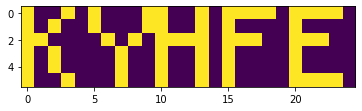

In [39]:
plt.imshow(imagekeeper, interpolation='nearest')
plt.show()

#### Day 9

In [40]:
class IntCode_v3:
    def __init__(self, intcode):
        self.intcode = intcode
        self.reset()
    
    def reset(self):
#         self.work_intcode = self.intcode[:]
        self.work_intcode = {idx:val for idx, val in enumerate(self.intcode)} 
        self.output = []
        self.mem = {}
        
    @classmethod
    def load(cls, filename):
        with open(filename, 'r') as file:
            return cls([int(x) for x in file.read().split(',')])
    
    @classmethod
    def test_txt(cls, text, calc, **input_dict):
        test_intcode = cls([int(x) for x in text.split(',')])
        test_intcode.intcodeRead(calc, outmode = 0, **input_dict)
    
    def mode_manage(self, num, mode):
        if mode == 0:
            return self.work_intcode.get(num, 0)
        elif mode == 1:
            return num
        elif mode == 2:
            return self.work_intcode.get(self.mem['relbase'] + num, 0)
    
    def spec_mode_manage(self, num, mode):
        if mode == 0 or mode == 1:
            return num
        elif mode == 2:
            return self.mem['relbase'] + num
                
    def instr_manage(self, selfmem):      
        current_idx =  selfmem['current_idx']
        
        instr_str = str(self.work_intcode.get(current_idx, 0))
        params = {x:int(y) for x, y in enumerate(reversed(instr_str[:len(instr_str)-2]))}
        opcode = instr_str[len(instr_str)-2:]
        
        
#         print(instr_str, opcode)
        if int(opcode) == 1:
            param_a = self.mode_manage(self.work_intcode.get(current_idx + 1, 0), params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode.get(current_idx + 2, 0), params.get(1, 0))
            output_loc = self.spec_mode_manage(self.work_intcode.get(current_idx + 3, 0), params.get(2, 0))
            
            self.work_intcode[output_loc] = param_a + param_b
            
            current_idx += 4
            
        elif int(opcode) == 2:
            param_a = self.mode_manage(self.work_intcode.get(current_idx + 1, 0), params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode.get(current_idx + 2, 0), params.get(1, 0))
            output_loc = self.spec_mode_manage(self.work_intcode.get(current_idx + 3, 0), params.get(2, 0))
            
            self.work_intcode[output_loc] = param_a * param_b
            
            current_idx += 4

        elif int(opcode) == 3: 
            try:
                move_num = self.spec_mode_manage(self.work_intcode.get(current_idx + 1, 0), params.get(0, 0))            
                self.work_intcode[move_num] = selfmem['inputs'][selfmem['input_idx']]
                selfmem['input_idx'] += 1
            
                current_idx += 2
            except IndexError:
                print('HALT COMMAND')
                selfmem['midhalt'] = 1
        
        elif int(opcode) == 4:
            val_output = self.mode_manage(self.work_intcode.get(current_idx + 1, 0), params.get(0, 0))
            self.output.append(val_output)
            
            current_idx += 2
        
        elif int(opcode) == 5:
            check = self.mode_manage(self.work_intcode.get(current_idx + 1, 0), params.get(0, 0))
            
            if check != 0:
                current_idx = self.mode_manage(self.work_intcode.get(current_idx + 2, 0), params.get(1, 0))
            else:
                current_idx += 3
        
        elif int(opcode) == 6:
            check = self.mode_manage(self.work_intcode.get(current_idx + 1, 0), params.get(0, 0))
            
            if check == 0:
                current_idx = self.mode_manage(self.work_intcode.get(current_idx + 2, 0), params.get(1, 0))
            else:
                current_idx += 3
        
        elif int(opcode) == 7:
            param_a = self.mode_manage(self.work_intcode.get(current_idx + 1, 0), params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode.get(current_idx + 2, 0), params.get(1, 0))
            output_loc = self.spec_mode_manage(self.work_intcode.get(current_idx + 3, 0), params.get(2, 0))
            
            if param_a < param_b:
                self.work_intcode[output_loc] = 1
            else:
                self.work_intcode[output_loc] = 0
            
            current_idx += 4
        
        elif int(opcode) == 8:
            param_a = self.mode_manage(self.work_intcode.get(current_idx + 1, 0), params.get(0, 0))
            param_b = self.mode_manage(self.work_intcode.get(current_idx + 2, 0), params.get(1, 0))
            output_loc = self.spec_mode_manage(self.work_intcode.get(current_idx + 3, 0), params.get(2, 0))
            
            if param_a == param_b:
                self.work_intcode[output_loc] = 1
            else:
                self.work_intcode[output_loc] = 0
                
            current_idx += 4
        
        elif int(opcode) == 9:
            rel_adj = self.mode_manage(self.work_intcode.get(current_idx + 1, 0), params.get(0, 0))
            
            selfmem['relbase'] += rel_adj
                
            current_idx += 2
        
        return current_idx
       
    def intcodeRead(self, calc, outmode = 1, **input_dict):
        current_idx = 0
        
        if self.mem == {}:
            self.mem = input_dict
            self.mem['input_idx'] = 0
            self.mem['midhalt'] = None
            self.mem['current_idx'] = 0
            self.mem['relbase'] = 0
            
            if isinstance(self.mem.get('inputs',0), int):
                self.mem['inputs'] = [self.mem.get('inputs',0)]
        else:
            self.mem['inputs'] = input_dict['inputs']
            self.mem['midhalt'] = 0
#         print(self.output)
             
        if calc == 'nv':
            print(
                f'Calculating using NOUN/VERB method\n' 
                f'Noun: {nv.get("noun", 0)}\n' 
                f'Verb: {nv.get("verb", 0)}\n' 
                f"Note: If noun or verb used in inputs are > 99, noun and verb default to intcode's default values"
            )
            self.work_intcode[1] = self.mem.get('noun', x[1])
            self.work_intcode[2] = self.mem.get('verb', x[2])
            
        elif calc == 'input':
            print(
                f'Calculating using input method\n'
                f'Note: Default value if "val" variable not in parameters is 0'
            )
        
        while self.work_intcode.get(self.mem['current_idx'], 0) != 99 and self.mem['midhalt'] != 1:
#             print(self.mem['current_idx'])
            self.mem['current_idx'] = self.instr_manage(self.mem)

        reconstituted = [self.work_intcode.get(x, 0) for x in range(max(self.work_intcode)+1)]
        if outmode == 1:
            return reconstituted, self.output
        elif outmode == 'output_only':
            return self.output
        else:
            print(reconstituted, self.output, self.mem.get('inputs'))

In [41]:
boost_run = IntCode_v3.load('day9.txt')

In [42]:
boost_run.intcodeRead(calc = 'input', outmode = 0, inputs = 1)

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
[1102, 34463338, 34463338, 63, 1007, 63, 34463338, 63, 1005, 63, 53, 1102, 3, 1, 1000, 109, 988, 209, 12, 9, 1000, 209, 6, 209, 3, 203, 0, 1008, 1000, 1, 63, 1005, 63, 65, 1008, 1000, 2, 63, 1005, 63, 904, 1008, 1000, 0, 63, 1005, 63, 58, 4, 25, 104, 0, 99, 4, 0, 104, 0, 99, 4, 17, 104, 0, 99, 0, 2204990589, 1101, 0, 31, 1019, 1101, 25, 0, 1008, 1102, 35, 1, 1009, 1102, 422, 1, 1029, 1102, 1, 21, 1005, 1102, 1, 734, 1027, 1102, 29, 1, 1000, 1101, 32, 0, 1018, 1102, 28, 1, 1016, 1101, 0, 38, 1015, 1101, 0, 378, 1023, 1101, 30, 0, 1017, 1102, 1, 381, 1022, 1101, 0, 37, 1006, 1102, 1, 1, 1021, 1101, 0, 24, 1011, 1102, 1, 23, 1002, 1101, 0, 0, 1020, 1101, 0, 20, 1007, 1101, 427, 0, 1028, 1101, 26, 0, 1014, 1101, 27, 0, 1010, 1101, 0, 39, 1001, 1101, 34, 0, 1012, 1102, 1, 36, 1013, 1101, 0, 33, 1003, 1101, 804, 0, 1025, 1101, 737, 0, 1026, 1102, 1, 809, 1024, 1102, 1, 22, 1004, 109, 9, 1201, -7, 0, 6

In [43]:
boost_run.reset()
boost_run.intcodeRead(calc = 'input', outmode = 0, inputs = 2)

Calculating using input method
Note: Default value if "val" variable not in parameters is 0
[1102, 34463338, 34463338, 63, 1007, 63, 34463338, 63, 1005, 63, 53, 1102, 3, 1, 1000, 109, 988, 209, 12, 9, 1000, 209, 6, 209, 3, 203, 0, 1008, 1000, 1, 63, 1005, 63, 65, 1008, 1000, 2, 63, 1005, 63, 904, 1008, 1000, 0, 63, 1005, 63, 58, 4, 25, 104, 0, 99, 4, 0, 104, 0, 99, 4, 17, 104, 0, 99, 1, 0, 1101, 0, 31, 1019, 1101, 25, 0, 1008, 1102, 35, 1, 1009, 1102, 422, 1, 1029, 1102, 1, 21, 1005, 1102, 1, 734, 1027, 1102, 29, 1, 1000, 1101, 32, 0, 1018, 1102, 28, 1, 1016, 1101, 0, 38, 1015, 1101, 0, 378, 1023, 1101, 30, 0, 1017, 1102, 1, 381, 1022, 1101, 0, 37, 1006, 1102, 1, 1, 1021, 1101, 0, 24, 1011, 1102, 1, 23, 1002, 1101, 0, 0, 1020, 1101, 0, 20, 1007, 1101, 427, 0, 1028, 1101, 26, 0, 1014, 1101, 27, 0, 1010, 1101, 0, 39, 1001, 1101, 34, 0, 1012, 1102, 1, 36, 1013, 1101, 0, 33, 1003, 1101, 804, 0, 1025, 1101, 737, 0, 1026, 1102, 1, 809, 1024, 1102, 1, 22, 1004, 109, 9, 1201, -7, 0, 63, 1008, 

#### Day 10

##### Part 1

In [44]:
with open('day10.txt', 'r') as file:
#     print(file.readlines())
    asteroid_alias = {}
    refval = 0
    for y, row in enumerate(file.readlines()):
        for x, symbol in enumerate(row.strip()):
            if symbol == '#':
                asteroid_alias[refval] = (x,y)
                refval += 1

In [45]:
def calculate_distance(ast1, ast2):
    ast1 = np.array(ast1) 
    ast2 = np.array(ast2)
  
    distance = np.linalg.norm(np.array(ast1) - np.array(ast2))
    
    return distance
    
def calculate_angle(ast1, ast2):
    ast1 = np.array(ast1) 
    ast2 = np.array(ast2)
    # Convert coordinate sytem from top left (0,0), to asteroid B in relative position to asteroid A (0,0)
    astB_coord = (ast2 - ast1) * [1, -1] # converts y-coordinate

    #calculate degrees based on coordinate of 2nd point
    angle = np.degrees(np.arctan2(*astB_coord))
    
    return angle

In [46]:
# for each asteroid (alias), check all asteroids, keep a dict of angles:distance, and change when a lower distance is found for an angle
ast_output = {alias:{} for alias in asteroid_alias.keys()}

for x, origin in asteroid_alias.items():
    for y, target in asteroid_alias.items():
        sight_angle = calculate_angle(origin, target)
        distance = calculate_distance(origin, target)
        
        if (ast_output[x].get(sight_angle, None) == None) or (ast_output[x].get(sight_angle, None) > distance):
            ast_output[x][sight_angle] = distance

In [47]:
best_asteroid_station = sorted(ast_output, key = lambda x: len(ast_output[x].keys()), reverse=True)[0] #Sort by # of keys
los = len(ast_output[289].keys()) # Length of internal dictionary = Number of asteroids visible
print(f'Asteroid {best_asteroid_station}: {los} asteroids in Line of Sight (including itself)')

Asteroid 289: 284 asteroids in Line of Sight (including itself)


##### Part 1

In [48]:
ast289 = asteroid_alias[289]
relative_to_289 = [(alias, calculate_angle(ast289, coord), calculate_distance(ast289, coord))\
                   for alias, coord in asteroid_alias.items() if alias is not 289]

In [49]:
angledict = defaultdict(list)

for ast in relative_to_289:
    angle = ast[1]
    
    if angle < 0:
        angle = angle + 360

    angledict[angle].append((ast[0], ast[2]))
    angledict[angle] = sorted(angledict[angle], key=lambda x: x[1], reverse=False)
    
range_targets = sorted(angledict.keys())

In [50]:
range_idx = 0
destroyed = 0
target_list = deepcopy(angledict)

for val in range(len(relative_to_289)):
    true_idx = range_idx % len(relative_to_289)
    current_traj = range_targets[true_idx]
    
    try:
        shot = target_list[current_traj]
        print(f'Destroy count: {destroyed + 1} | Asteroid {shot[0]} destroyed, location {asteroid_alias[shot[0][0]]}')
        shot.pop(0)
        
        destroyed += 1
    except IndexError:
        print(f'No more asteroids in angle {current_traj}')
        continue
    
    
    range_idx += 1

Destroy count: 1 | Asteroid (289, 0.0) destroyed, location (20, 19)
Destroy count: 2 | Asteroid (12, 19.026297590440446) destroyed, location (21, 0)
Destroy count: 3 | Asteroid (56, 16.0312195418814) destroyed, location (21, 3)
Destroy count: 4 | Asteroid (69, 15.033296378372908) destroyed, location (21, 4)
Destroy count: 5 | Asteroid (113, 12.041594578792296) destroyed, location (21, 7)
Destroy count: 6 | Asteroid (13, 19.1049731745428) destroyed, location (22, 0)
Destroy count: 7 | Asteroid (153, 9.055385138137417) destroyed, location (21, 10)
Destroy count: 8 | Asteroid (166, 8.06225774829855) destroyed, location (21, 11)
Destroy count: 9 | Asteroid (187, 7.0710678118654755) destroyed, location (21, 12)
Destroy count: 10 | Asteroid (99, 13.152946437965905) destroyed, location (22, 6)
Destroy count: 11 | Asteroid (14, 19.235384061671343) destroyed, location (23, 0)
Destroy count: 12 | Asteroid (31, 18.24828759089466) destroyed, location (23, 1)
Destroy count: 13 | Asteroid (125, 11.1

IndexError: list index out of range

In [ ]:
# 200th destroyed asteroid: Alias 60, poistion (4,4)
# Answer is X * 100 + Y = 404

#### Day 11

##### Part 1

In [ ]:
# Notes
[0,1]	up
[-1, 0]	left
[0, -1]	down	
[1, 0]	right

[0,1]	up	0
[1, 0]	right	1
[0, -1]	down	2
[-1, 0]	left	3

if 1:
  idx += 1
elif 0:
  idx -= 1

true_idx = idx % 4

In [ ]:
def painting_robot(intcode):